In [2]:
#import requests
#import bs4
#from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500) # to display 500 rows

import time
from datetime import datetime

In [3]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =   'cms_claims' # 'cms_medicare_claims'  #

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

In [4]:
# Check Tables in the Database
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

tablename
0             icd9_diagonsis
1            icd9_procedures
2                      hcpcs
3            beneficiary2008
4            beneficiary2009
5            beneficiary2010
6           inpatient_claims
7          outpatient_claims
8   prescription_drug_events
9             final2008_2009
10          final2008_2009v1
11            ICD_Vectorized

In [5]:
# final2008_2009 is already with replaced Nulls and flags


# Replacing  Nulls with 0

query = """

SELECT 

     "DESYNPUF_ID"
    , "BENE_BIRTH_DT"
    , COALESCE("BENE_DEATH_DT", '2100-01-01') as "BENE_DEATH_DT"
    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"
    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"
    , cast((CASE when "END_STAGE_RENAL2008" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2008"
    , cast((CASE when "END_STAGE_RENAL2009" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2009"
    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"
    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"
    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"
    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"
    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"
    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"
    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"
    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR2009"
    , COALESCE("SP_COPD2008", 0) as "SP_COPD2008"
    , COALESCE("SP_COPD2009", 0) as "SP_COPD2009"
    , COALESCE("SP_DEPRESSN2008", 0) as "SP_DEPRESSN2008"
    , COALESCE("SP_DEPRESSN2009", 0) as "SP_DEPRESSN2009"
    , COALESCE("SP_DIABETES2008", 0) as "SP_DIABETES2008"
    , COALESCE("SP_DIABETES2009", 0) as "SP_DIABETES2009"
    , COALESCE("SP_ISCHMCHT2008", 0) as "SP_ISCHMCHT2008"
    , COALESCE("SP_ISCHMCHT2009", 0) as "SP_ISCHMCHT2009"
    , COALESCE("SP_OSTEOPRS2008", 0) as "SP_OSTEOPRS2008"
    , COALESCE("SP_OSTEOPRS2009", 0) as "SP_OSTEOPRS2009"
    , COALESCE("SP_RA_OA2008", 0) as "SP_RA_OA2008"
    , COALESCE("SP_RA_OA2009", 0) as "SP_RA_OA2009"
    , COALESCE("SP_STRKETIA2008", 0) as "SP_STRKETIA2008"
    , COALESCE("TOTAL_DIAGNOSIS2008", 0) as "TOTAL_DIAGNOSIS2008"
    , COALESCE("TOTAL_DIAGNOSIS2009", 0) as "TOTAL_DIAGNOSIS2009"
    , COALESCE("TOTAL_PAYMENT2008", 0) as "TOTAL_PAYMENT2008"
    , COALESCE("TOTAL_PAYMENT2009", 0) as "TOTAL_PAYMENT2009"
    , COALESCE("CHANGE_IN_PAYMEMT", 0) as "CHANGE_IN_PAYMEMT"
    , COALESCE("CHANGE_IN_DIANOSIS", 0) as "CHANGE_IN_DIAGNOSIS"
    , COALESCE("DEAD", 0) as "DEAD"
    , COALESCE("AGE", 0) as "AGE"
    , COALESCE("LOS", 0) as "LOS"
    , COALESCE("NUM_INPT_ADM", 0) as "NUM_INPT_ADM"
    , COALESCE("TOTAL_INPT_COST", 0) as "TOTAL_INPT_COST"
    , COALESCE("TOTAL_INPT_DIAGNOSIS", 0) as "TOTAL_INPT_DIAGNOSIS"
    , COALESCE("TOTAL_INPT_PROCS", 0) as "TOTAL_INPT_PROCS"
    , COALESCE("READMIT7", 0) as "READMIT7" 
    , COALESCE("READMIT30", 0) as "READMIT30"
    , COALESCE("READMIT60", 0) as "READMIT60"
    , COALESCE("READMIT90", 0) as "READMIT90"
    , COALESCE("NUM_OPD_VISIT", 0) as "NUM_OPD_VISIT"
    , COALESCE("TOTAL_OPD_COST", 0) as "TOTAL_OPD_COST"
    , COALESCE("TOTAL_OPD_DIAGNOSIS", 0) as "TOTAL_OPD_DIAGNOSIS"
    , COALESCE("TOTAL_OPD_PROCS", 0) as "TOTAL_OPD_PROCS"
    , COALESCE("TOTAL_OPD_HCPCS", 0) as "TOTAL_OPD_HCPCS"
    , COALESCE("TOTAL_QTY_DSPNSD_NUM", 0) as "TOTAL_QTY_DSPNSD_NUM"
    , COALESCE("PTNT_PAY_RX_AMT", 0) as "PTNT_PAY_RX_AMT"
    , COALESCE("TOT_RX_CST_AMT", 0) as "TOT_RX_CST_AMT"
    , COALESCE("INPT_DIAGS", '') as "INPT_DIAGS"
    , COALESCE("INPT_PROCS", '') as "INPT_PROCS"
    , COALESCE("OPD_DIAGS", '') as "OPD_DIAGS"
    , COALESCE("OPD_PROCS", '') as "OPD_PROCS"
    , COALESCE("OPD_HCPCS", '') as "OPD_HCPCS"
    , CASE when "READMIT7" = 0.0 then 0 else 1 END as "READMIT7_FLAG"  
    , CASE when "READMIT30" = 0.0 then 0 else 1 END as "READMIT30_FLAG" 
    , CASE when "READMIT60" = 0.0 then 0 else 1 END as "READMIT60_FLAG" 
    , CASE when "READMIT90" = 0.0 then 0 else 1 END as "READMIT90_FLAG" 

FROM final2008_2009
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)

(458328, 62)


DESYNPUF_ID BENE_BIRTH_DT BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0  00000B48BCF4AD29    1923-09-01    2100-01-01                  2   
1  0000141F2FECE9BC    1974-04-01    2100-01-01                  2   

   BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  SP_ALZHDMTA2008  \
0             5                    0                    0                1   
1             1                    0                    0                2   

   SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  \
0                1           1           1                1                2   
1                2           2           2                2                2   

   SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  \
0            1            2            2            2                1   
1            2            2            2            2                2   

   SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  \
0                1                1                1                1   
1                1                2                2                2   

   SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  \
0                1                1                1             2   
1                2                2                2             2   

   SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0             2                1                    9                    6   
1             2                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS  DEAD   AGE               LOS  NUM_INPT_ADM  \
0                   -3     0  86.0  2419200000000000           3.0   
1                    1     0  35.0   172800000000000           1.0   

   TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  READMIT7  \
0          84072.0                  27.0              11.0       1.0   
1           5108.0                   9.0               1.0       0.0   

   READMIT30  READMIT60  READMIT90  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0        2.0        2.0        2.0           10.0          3210.0   
1        0.0        0.0        0.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0                 210.0             10.0           200.0   
1                9930.0           1740.0         13490.0   

                                          INPT_DIAGS  \
0  3970 2800 9971 41410 V4581 2875 5121 4242 4273...   
1      5789 79029 5363 5990 3569 2449 2851 311 2869    

                                          INPT_PROCS  \
0  3615 53081 42820 78321 78321 27493521 9971 560...   
1                                          4516        

                                           OPD_DIAGS  \
0  2370         2279 V1005 4019 56210 20280 V4581...   
1  70709 4149 25000 70712 70709 70707 V4582 4321 ...   

                                           OPD_PROCS  \
0                                                ...   
1                                                ...   

                                           OPD_HCPCS  READMIT7_FLAG  \
0    81001 J3420 96372 96375 70450 99284 99212 90...              1   
1  99214  85730 84443 84100 87086 87046 84436 850...              0   

   READMIT30_FLAG  READMIT60_FLAG  READMIT90_FLAG  
0               1               1               1  
1               0               0               0

In [6]:
''' query = """

SELECT * 
FROM final2008_2009
"""

df_1 = pd.read_sql(query, conn) 

print(df_1.shape)
df_1.head(2)
'''

' query = """\n\nSELECT * \nFROM final2008_2009\n"""\n\ndf_1 = pd.read_sql(query, conn) \n\nprint(df_1.shape)\ndf_1.head(2)\n'

In [7]:
#df.READMIT90_FLAG.unique()

In [8]:
# Checking for nulls

df.isnull().sum()

DESYNPUF_ID             0
BENE_BIRTH_DT           0
BENE_DEATH_DT           0
BENE_SEX_IDENT_CD       0
BENE_RACE_CD            0
END_STAGE_RENAL2008     0
END_STAGE_RENAL2009     0
SP_ALZHDMTA2008         0
SP_ALZHDMTA2009         0
SP_CHF2008              0
SP_CHF2009              0
SP_CHRNKIDN2008         0
SP_CHRNKIDN2009         0
SP_CNCR2008             0
SP_CNCR2009             0
SP_COPD2008             0
SP_COPD2009             0
SP_DEPRESSN2008         0
SP_DEPRESSN2009         0
SP_DIABETES2008         0
SP_DIABETES2009         0
SP_ISCHMCHT2008         0
SP_ISCHMCHT2009         0
SP_OSTEOPRS2008         0
SP_OSTEOPRS2009         0
SP_RA_OA2008            0
SP_RA_OA2009            0
SP_STRKETIA2008         0
TOTAL_DIAGNOSIS2008     0
TOTAL_DIAGNOSIS2009     0
TOTAL_PAYMENT2008       0
TOTAL_PAYMENT2009       0
CHANGE_IN_PAYMEMT       0
CHANGE_IN_DIAGNOSIS     0
DEAD                    0
AGE                     0
LOS                     0
NUM_INPT_ADM            0
TOTAL_INPT_C

In [9]:
#Checking data types

#df.dtypes

In [10]:
df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'DEAD', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',

In [13]:
''' # ICD count vectorizer DF

query = """

SELECT * 
FROM ICD_Vectorized
"""

df_ICD = pd.read_sql(query, conn) 

print(df_ICD.shape)
df_ICD.head(2)
'''

' # ICD count vectorizer DF\n\nquery = """\n\nSELECT * \nFROM ICD_Vectorized\n"""\n\ndf_ICD = pd.read_sql(query, conn) \n\nprint(df_ICD.shape)\ndf_ICD.head(2)\n'

In [17]:
'''  # Merging both the DFs to get the final DF

query = """ SELECT  
            *
                 
       FROM final2008_2009 as final
            INNER JOIN ICD_Vectorized as ICD ON final."DESYNPUF_ID" = ICD."DESYNPUF_ID"  ;
  """

df = pd.read_sql(query, conn) 

print(df.shape)
df.head(2)
''' 

'  # Merging both the DFs to get the final DF\n\nquery = """ SELECT  \n            *\n                 \n       FROM final2008_2009 as final\n            INNER JOIN ICD_Vectorized as ICD ON final."DESYNPUF_ID" = ICD."DESYNPUF_ID"  ;\n  """\n\ndf = pd.read_sql(query, conn) \n\nprint(df.shape)\ndf.head(2)\n'

In [11]:
# removing None

df.INPT_DIAGS.fillna('', inplace=True)
df.INPT_PROCS.fillna('', inplace=True)
df.OPD_DIAGS.fillna('', inplace=True)
df.OPD_PROCS.fillna('', inplace=True)

In [9]:
# Combining all the diagnosis and procedure codes from inpatient and outpatient visits (as some codes may be 
#repated and we want total counts, not duplicate features)

df_ICD_codes = df.INPT_DIAGS + df.INPT_PROCS + df.OPD_DIAGS + df.OPD_PROCS
df_ICD_codes.shape

(458328,)

In [10]:
''' from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(df_ICD_codes.values)
ICD_codes_vectorized = cvec.transform(df_ICD_codes.values)
'''

In [11]:
ICD_codes_vectorized.shape

(458328, 45860)

In [12]:
#scaler = StandardScaler()
#ICD_codes_vectorized = scaler.fit_transform(ICD_codes_vectorized)
datetime.now()

datetime.datetime(2020, 5, 12, 20, 22, 58, 703805)

In [13]:
'''
from sklearn.decomposition import PCA, SparsePCA, TruncatedSVD

Truncated_pca = TruncatedSVD(n_components=500) # 500 return approx 72% of the variance

# PCA fit-tranform 
ICD_codes_vectorized_pca = Truncated_pca.fit_transform(ICD_codes_vectorized) #.toarray()

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): Truncated_pca.components_[i]
            for i in range(len(Truncated_pca.components_))}

df_ICD_codes_vectorized_pca = pd.DataFrame(ICD_codes_vectorized_pca, columns=PCA_col_dict) 
print(df_ICD_codes_vectorized_pca.shape)

df_ICD_codes_vectorized_pca.head(2) '''

(458328, 500)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  3.625634 -0.786301 -0.946801 -0.030245  1.129191  1.762411  0.205516   
1  4.311950 -0.287842  2.210472 -1.933581  1.798780  0.800790 -0.359583   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.688384  0.343620 -0.572614 -0.414013  1.324290 -1.096321  0.053538   
1 -0.369305  1.352232 -0.148075  0.303799  0.781164 -0.493005  0.687498   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0  1.403125 -0.839170 -0.478983 -0.339575  0.693785  0.100106 -0.464426   
1 -0.597395  1.643601  0.700513  0.829547  0.580763 -0.666055  0.072543   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  \
0  0.070825  0.182432 -0.146545  0.993364 -1.350006  0.354650  0.194013   
1 -0.678061 -0.221133 -0.063387  0.310939  0.532719 -0.304891 -0.589432   

      PCA29     PCA30     PCA31     PCA32     PCA33     PCA34     PCA35  \
0 -0.756281 -0.001135 -0.107875  0.637469 -0.104751 -0.083831  0.048040   
1 -0.315004 -0.356705  0.804796  0.001545 -0.392707 -0.153421  0.567619   

      PCA36     PCA37     PCA38     PCA39     PCA40     PCA41     PCA42  \
0  0.485905 -0.228439 -0.170822  0.193776 -0.243370 -0.125656 -0.286858   
1 -0.225773  0.437782  0.224154  0.721464 -0.031626  1.872665 -0.042057   

      PCA43     PCA44     PCA45     PCA46     PCA47     PCA48     PCA49  \
0  0.333452 -0.232354 -0.343612 -0.234086 -0.052748 -0.195970  0.558195   
1 -0.483526  0.336852 -0.092354 -0.176249  0.550685  0.027447  0.950879   

      PCA50     PCA51     PCA52     PCA53     PCA54     PCA55     PCA56  \
0  0.167209 -0.455478 -0.104379 -0.047232 -0.108722 -0.070704  0.001297   
1 -0.308889  0.085537  0.029079  0.496987 -0.268047 -0.541088 -0.593118   

      PCA57     PCA58     PCA59     PCA60     PCA61     PCA62    PCA63  \
0  0.133040  0.786659 -0.937389  0.845481 -0.363916 -0.249854 -0.35123   
1 -0.466163  0.027431 -0.188769 -0.063667  0.317691  0.000493  0.33349   

      PCA64     PCA65     PCA66     PCA67     PCA68    PCA69     PCA70  \
0 -0.033040  0.100694  0.124710  0.004086  0.018572  0.17460  0.297125   
1 -0.059402  0.060197 -0.977261  0.590378  0.199474 -0.19963 -0.355060   

      PCA71     PCA72     PCA73     PCA74     PCA75     PCA76     PCA77  \
0  0.040323 -0.040553  0.660482 -0.777326  0.196430  0.664298 -0.311375   
1 -0.040077  0.663689 -0.248173  0.093612  1.042815 -0.118541  1.457471   

      PCA78     PCA79     PCA80     PCA81     PCA82     PCA83     PCA84  \
0 -0.187255 -0.429443  0.118670 -0.077042 -0.336221 -0.177198  0.222200   
1  0.172859 -0.958445 -0.965189 -0.332591  0.358207 -0.631904 -0.263866   

      PCA85     PCA86     PCA87     PCA88     PCA89     PCA90     PCA91  \
0 -0.329868 -0.287480  0.087094 -0.006458  0.076806 -0.057438 -0.034284   
1  0.195666 -0.442388 -0.213419 -0.437890 -0.159782 -0.454238  0.115083   

      PCA92     PCA93     PCA94     PCA95     PCA96     PCA97     PCA98  \
0 -0.125606  0.086486 -0.031390 -0.040297 -0.048800  0.088230  0.114344   
1 -0.658339  0.346989  0.995586 -0.694261  0.282422 -0.078265 -0.367201   

      PCA99    PCA100    PCA101    PCA102    PCA103    PCA104    PCA105  \
0  0.074228  0.009394  0.083591  0.002719  0.091783  0.127739  0.312350   
1  0.062974 -0.686012 -0.306385 -0.434317  1.098203 -0.647189 -0.701028   

     PCA106    PCA107    PCA108    PCA109    PCA110    PCA111    PCA112  \
0  0.030546  0.313970  0.114956  0.032628  0.252442 -0.043981 -0.273024   
1 -0.161918  0.300407  0.206309  0.484406 -0.217183 -0.781222 -0.459388   

     PCA113    PCA114    PCA115    PCA116    PCA117    PCA118    PCA119  \
0  0.234460  0.416629 -0.716106 -0.232506  0.148560  1.183237 -0.420046   
1 -0.365111 -0.595902  0.142966 -0.045376  0.024287  0.097012  0.085165   

     PCA120    PCA121    PCA122    PCA123    PCA124    PCA125    PCA126  \
0 -0.699892 -0.789855  0.305691  0.224560  0.390995 -0.046541 -0.432412   
1  0.107048  0.137601

In [1]:
#Truncated_pca.explained_variance_ratio_.cumsum()

In [15]:
'''df_ICD_codes_vectorized_pca['DESYNPUF_ID'] = df['DESYNPUF_ID']

print(df_ICD_codes_vectorized_pca.shape)
df_ICD_codes_vectorized_pca.head(2)'''

(458328, 501)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  3.625634 -0.786301 -0.946801 -0.030245  1.129191  1.762411  0.205516   
1  4.311950 -0.287842  2.210472 -1.933581  1.798780  0.800790 -0.359583   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.688384  0.343620 -0.572614 -0.414013  1.324290 -1.096321  0.053538   
1 -0.369305  1.352232 -0.148075  0.303799  0.781164 -0.493005  0.687498   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0  1.403125 -0.839170 -0.478983 -0.339575  0.693785  0.100106 -0.464426   
1 -0.597395  1.643601  0.700513  0.829547  0.580763 -0.666055  0.072543   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  \
0  0.070825  0.182432 -0.146545  0.993364 -1.350006  0.354650  0.194013   
1 -0.678061 -0.221133 -0.063387  0.310939  0.532719 -0.304891 -0.589432   

      PCA29     PCA30     PCA31     PCA32     PCA33     PCA34     PCA35  \
0 -0.756281 -0.001135 -0.107875  0.637469 -0.104751 -0.083831  0.048040   
1 -0.315004 -0.356705  0.804796  0.001545 -0.392707 -0.153421  0.567619   

      PCA36     PCA37     PCA38     PCA39     PCA40     PCA41     PCA42  \
0  0.485905 -0.228439 -0.170822  0.193776 -0.243370 -0.125656 -0.286858   
1 -0.225773  0.437782  0.224154  0.721464 -0.031626  1.872665 -0.042057   

      PCA43     PCA44     PCA45     PCA46     PCA47     PCA48     PCA49  \
0  0.333452 -0.232354 -0.343612 -0.234086 -0.052748 -0.195970  0.558195   
1 -0.483526  0.336852 -0.092354 -0.176249  0.550685  0.027447  0.950879   

      PCA50     PCA51     PCA52     PCA53     PCA54     PCA55     PCA56  \
0  0.167209 -0.455478 -0.104379 -0.047232 -0.108722 -0.070704  0.001297   
1 -0.308889  0.085537  0.029079  0.496987 -0.268047 -0.541088 -0.593118   

      PCA57     PCA58     PCA59     PCA60     PCA61     PCA62    PCA63  \
0  0.133040  0.786659 -0.937389  0.845481 -0.363916 -0.249854 -0.35123   
1 -0.466163  0.027431 -0.188769 -0.063667  0.317691  0.000493  0.33349   

      PCA64     PCA65     PCA66     PCA67     PCA68    PCA69     PCA70  \
0 -0.033040  0.100694  0.124710  0.004086  0.018572  0.17460  0.297125   
1 -0.059402  0.060197 -0.977261  0.590378  0.199474 -0.19963 -0.355060   

      PCA71     PCA72     PCA73     PCA74     PCA75     PCA76     PCA77  \
0  0.040323 -0.040553  0.660482 -0.777326  0.196430  0.664298 -0.311375   
1 -0.040077  0.663689 -0.248173  0.093612  1.042815 -0.118541  1.457471   

      PCA78     PCA79     PCA80     PCA81     PCA82     PCA83     PCA84  \
0 -0.187255 -0.429443  0.118670 -0.077042 -0.336221 -0.177198  0.222200   
1  0.172859 -0.958445 -0.965189 -0.332591  0.358207 -0.631904 -0.263866   

      PCA85     PCA86     PCA87     PCA88     PCA89     PCA90     PCA91  \
0 -0.329868 -0.287480  0.087094 -0.006458  0.076806 -0.057438 -0.034284   
1  0.195666 -0.442388 -0.213419 -0.437890 -0.159782 -0.454238  0.115083   

      PCA92     PCA93     PCA94     PCA95     PCA96     PCA97     PCA98  \
0 -0.125606  0.086486 -0.031390 -0.040297 -0.048800  0.088230  0.114344   
1 -0.658339  0.346989  0.995586 -0.694261  0.282422 -0.078265 -0.367201   

      PCA99    PCA100    PCA101    PCA102    PCA103    PCA104    PCA105  \
0  0.074228  0.009394  0.083591  0.002719  0.091783  0.127739  0.312350   
1  0.062974 -0.686012 -0.306385 -0.434317  1.098203 -0.647189 -0.701028   

     PCA106    PCA107    PCA108    PCA109    PCA110    PCA111    PCA112  \
0  0.030546  0.313970  0.114956  0.032628  0.252442 -0.043981 -0.273024   
1 -0.161918  0.300407  0.206309  0.484406 -0.217183 -0.781222 -0.459388   

     PCA113    PCA114    PCA115    PCA116    PCA117    PCA118    PCA119  \
0  0.234460  0.416629 -0.716106 -0.232506  0.148560  1.183237 -0.420046   
1 -0.365111 -0.595902  0.142966 -0.045376  0.024287  0.097012  0.085165   

     PCA120    PCA121    PCA122    PCA123    PCA124    PCA125    PCA126  \
0 -0.699892 -0.789855  0.305691  0.224560  0.390995 -0.046541 -0.432412   
1  0.107048  0.137601

In [16]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 26, 9, 149440)

In [17]:
'''df = df.merge(df_ICD_codes_vectorized_pca, on='DESYNPUF_ID', how='inner', left_index=True, right_index=True)
print(df.shape)
df.head(2)'''

(458328, 562)


DESYNPUF_ID BENE_BIRTH_DT BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0  00000B48BCF4AD29    1923-09-01    2100-01-01                  2   
1  0000141F2FECE9BC    1974-04-01    2100-01-01                  2   

   BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  SP_ALZHDMTA2008  \
0             5                    0                    0                1   
1             1                    0                    0                2   

   SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  \
0                1           1           1                1                2   
1                2           2           2                2                2   

   SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  \
0            1            2            2            2                1   
1            2            2            2            2                2   

   SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  \
0                1                1                1                1   
1                1                2                2                2   

   SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  \
0                1                1                1             2   
1                2                2                2             2   

   SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0             2                1                    9                    6   
1             2                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS  DEAD   AGE               LOS  NUM_INPT_ADM  \
0                   -3     0  86.0  2419200000000000           3.0   
1                    1     0  35.0   172800000000000           1.0   

   TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  READMIT7  \
0          84072.0                  27.0              11.0       1.0   
1           5108.0                   9.0               1.0       0.0   

   READMIT30  READMIT60  READMIT90  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0        2.0        2.0        2.0           10.0          3210.0   
1        0.0        0.0        0.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0                 210.0             10.0           200.0   
1                9930.0           1740.0         13490.0   

                                          INPT_DIAGS  \
0  3970 2800 9971 41410 V4581 2875 5121 4242 4273...   
1      5789 79029 5363 5990 3569 2449 2851 311 2869    

                                          INPT_PROCS  \
0  3615 53081 42820 78321 78321 27493521 9971 560...   
1                                          4516        

                                           OPD_DIAGS  \
0  2370         2279 V1005 4019 56210 20280 V4581...   
1  70709 4149 25000 70712 70709 70707 V4582 4321 ...   

                                           OPD_PROCS  \
0                                                ...   
1                                                ...   

                                           OPD_HCPCS  READMIT7_FLAG  \
0    81001 J3420 96372 96375 70450 99284 99212 90...              1   
1  99214  85730 84443 84100 87086 87046 84436 850...              0   

   READMIT30_FLAG  READMIT60_FLAG  READMIT90_FLAG      PCA1      PCA2  \
0               1               1               1  3.625634 -0.786301   
1               0               0               0  4.311950 -0.287842   

       PCA3      PCA4      PCA5      PCA6      PCA7      PCA8      PCA9  \
0 -0.946801 -0.030245  1.129191  1.762411  0.205516 -0.688384 

In [18]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 26, 22, 51607)

#### Visualizing the spread of information 

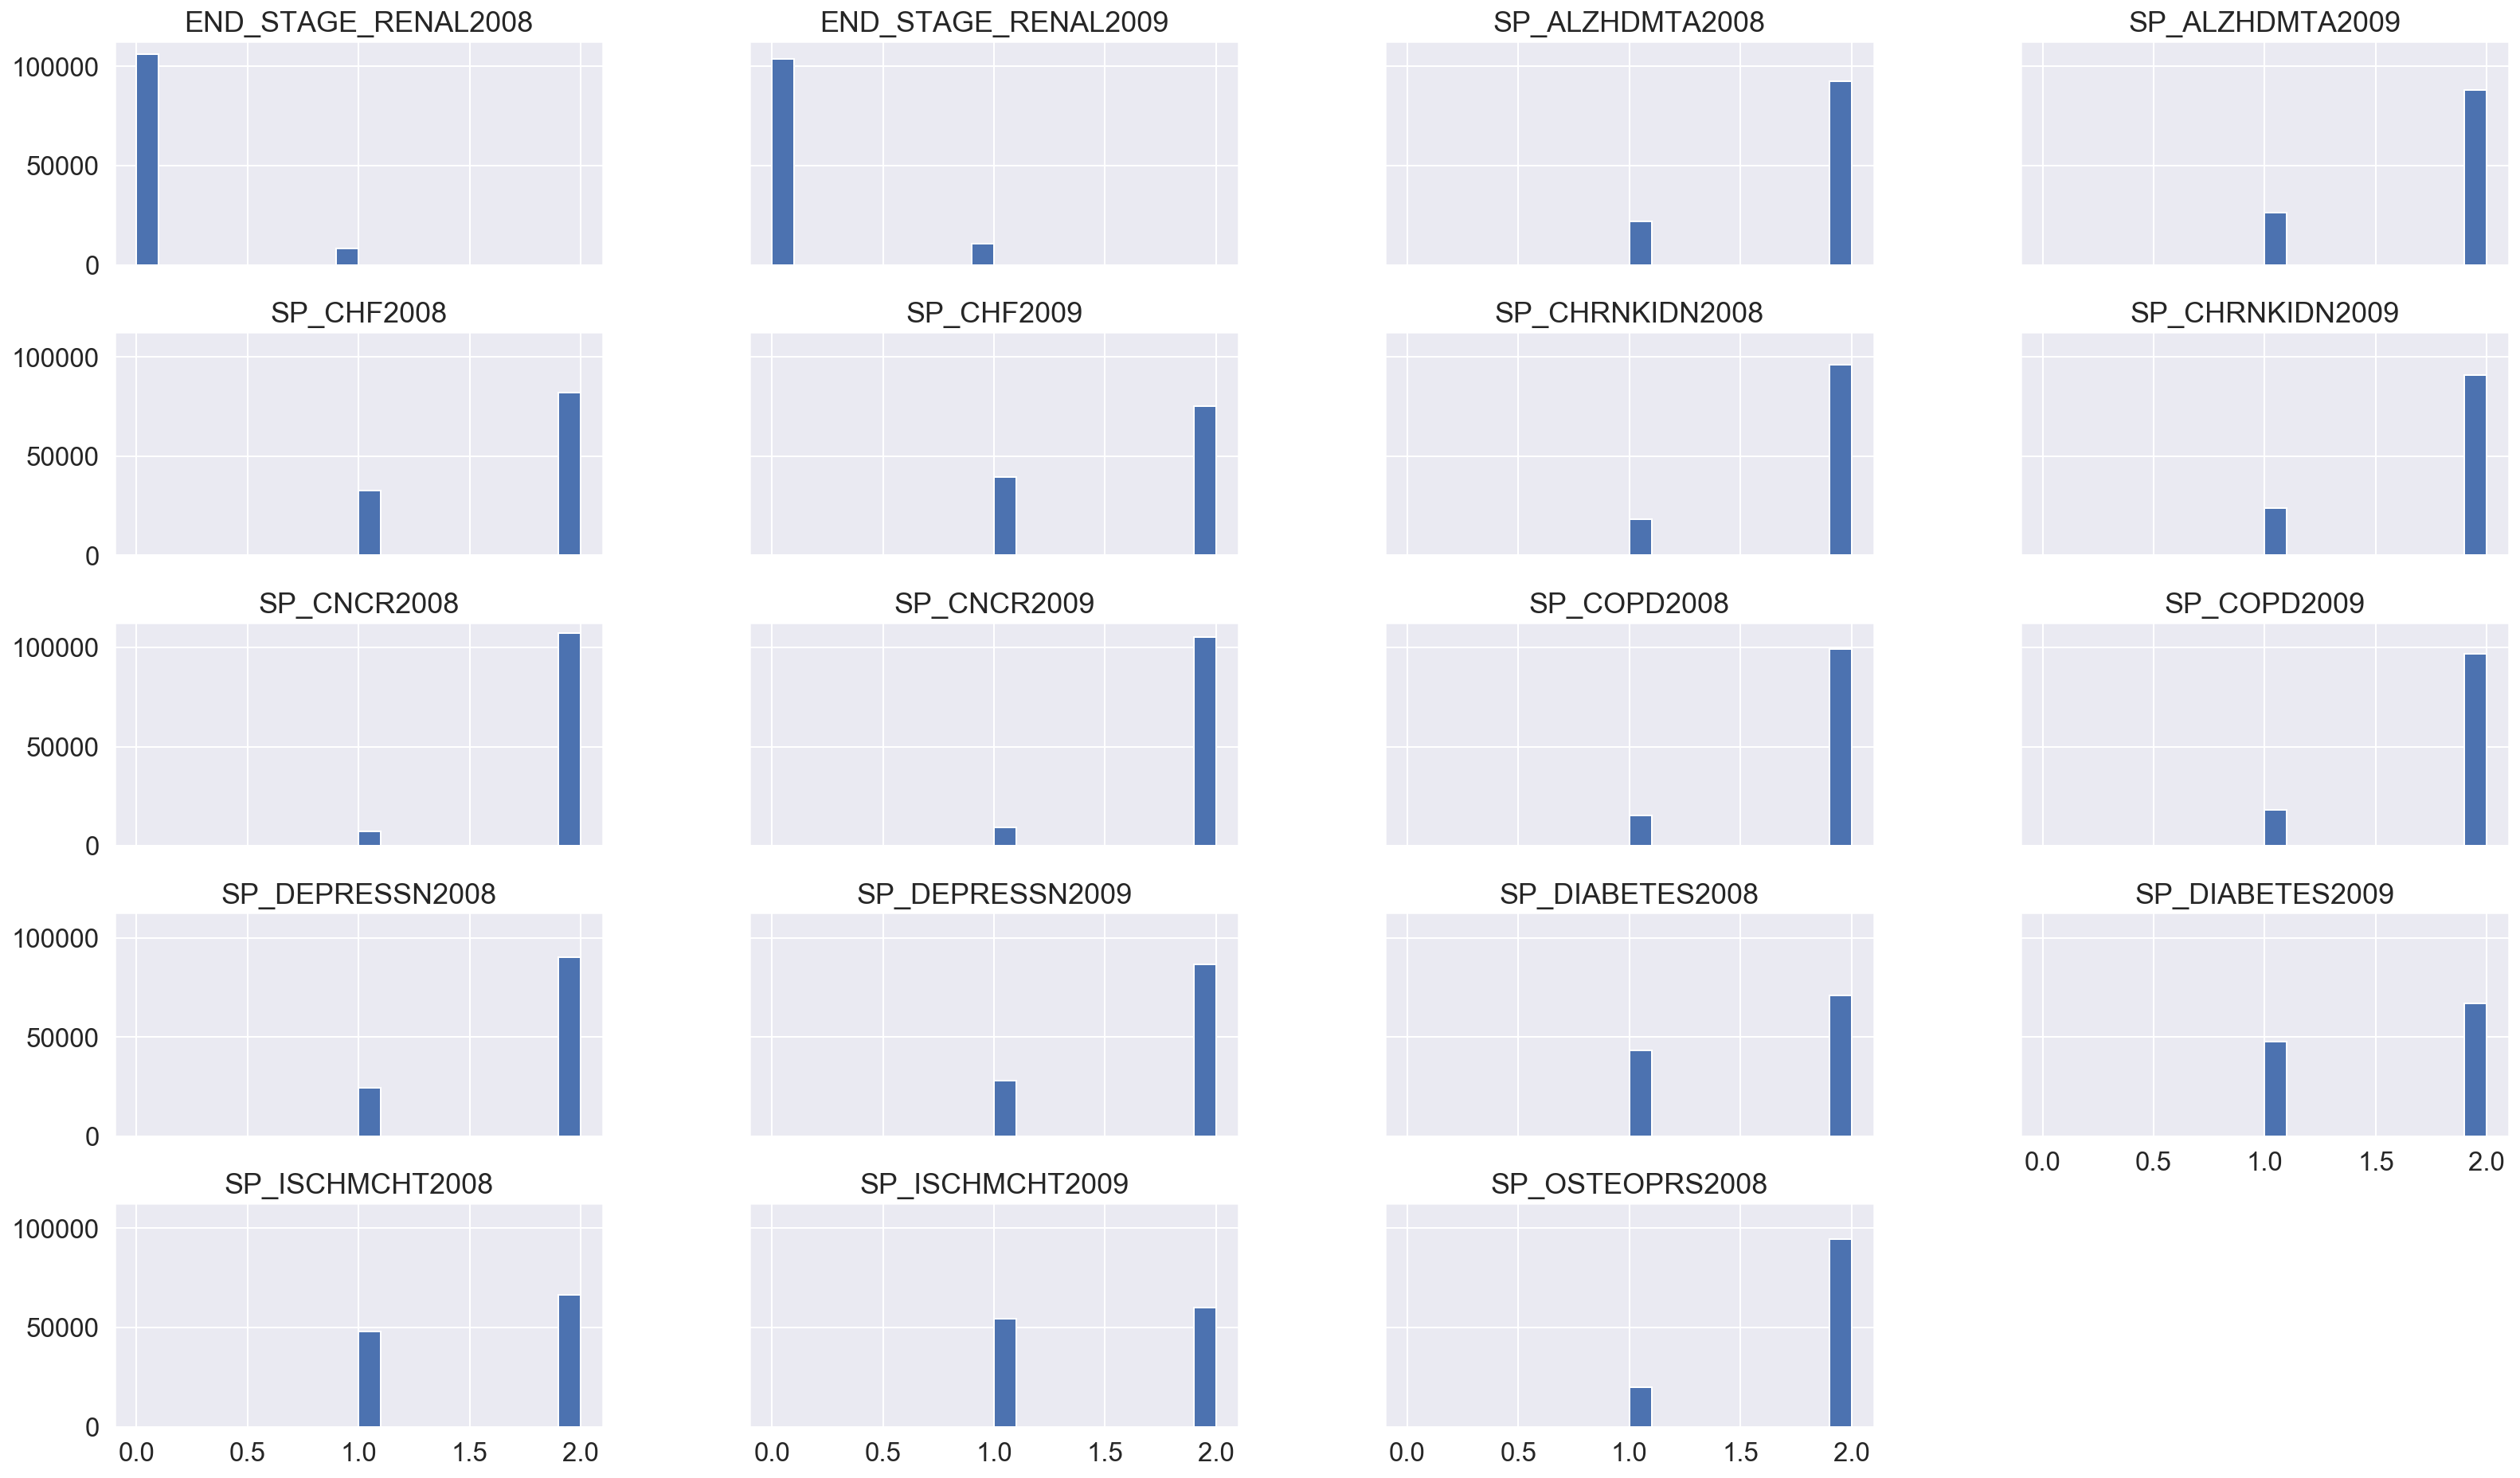

In [34]:
# Plot value_counts ??

df.iloc[:,5:24].hist(figsize=(24,16), sharex=True, sharey=True)
plt.show()  # 1 means have diesease, 2 means no disease

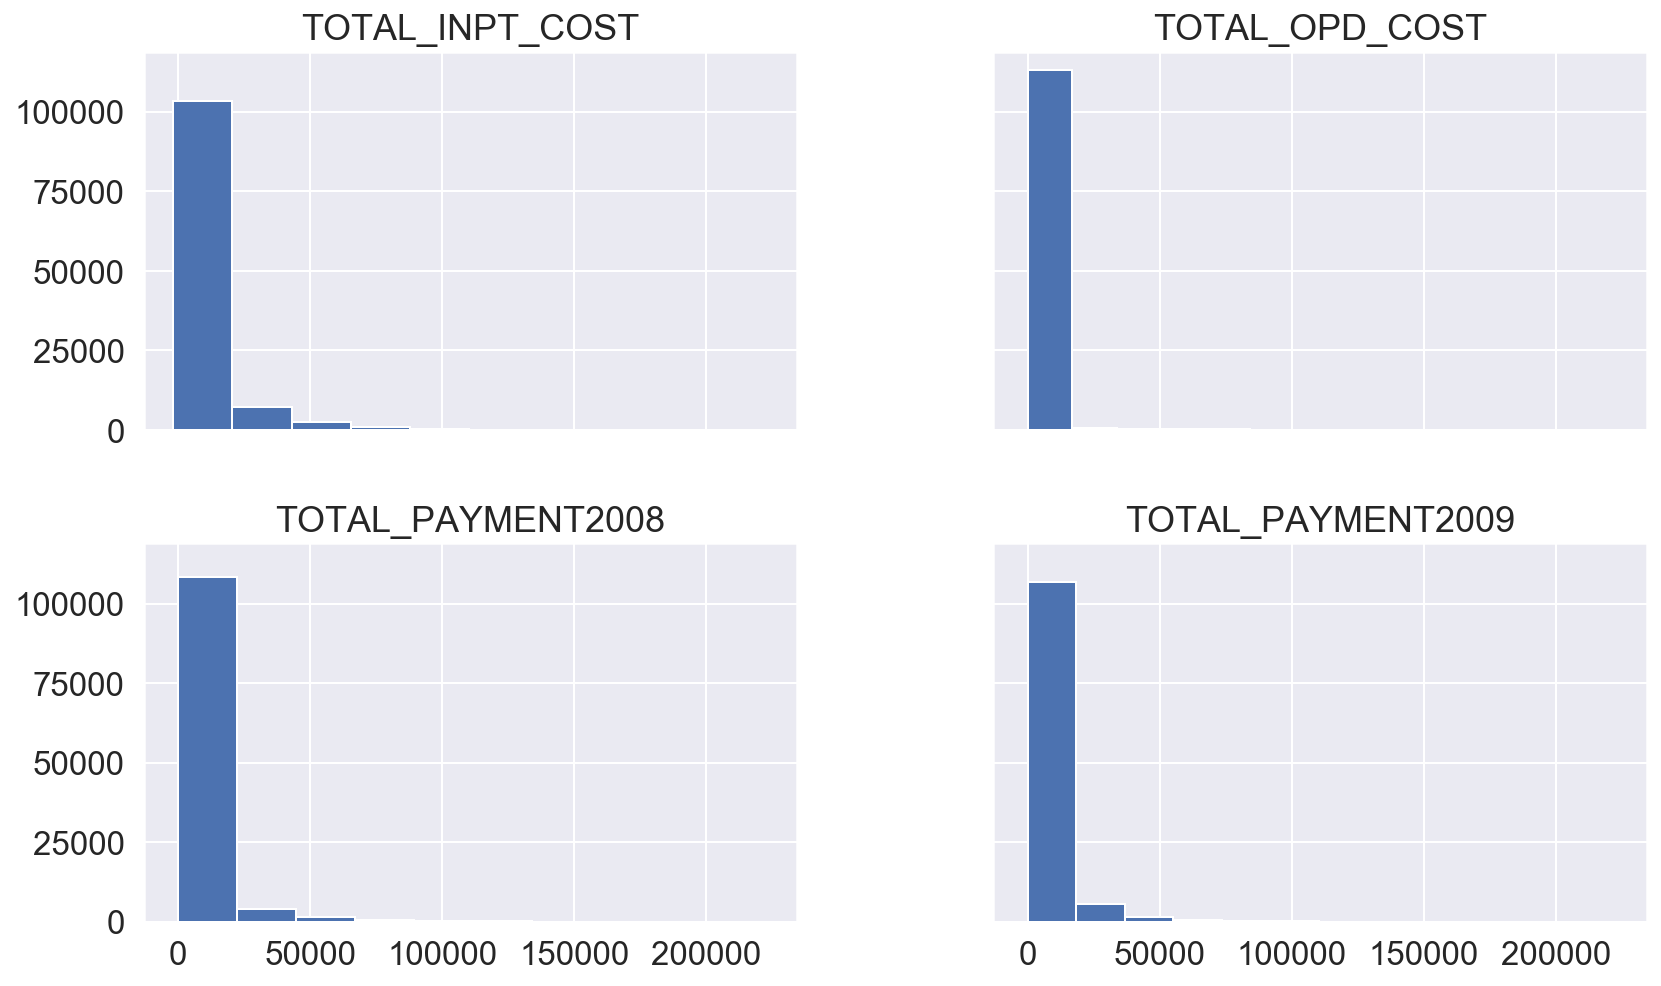

In [35]:
df[['TOTAL_INPT_COST', 'TOTAL_OPD_COST',
                                    'TOTAL_PAYMENT2008',
                                    'TOTAL_PAYMENT2009']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()  

In [30]:
#final2008_2009DF_selectedFeatures.iloc[:,20:29].hist(figsize=(12,20), sharex=True, sharey=True)
#plt.show()

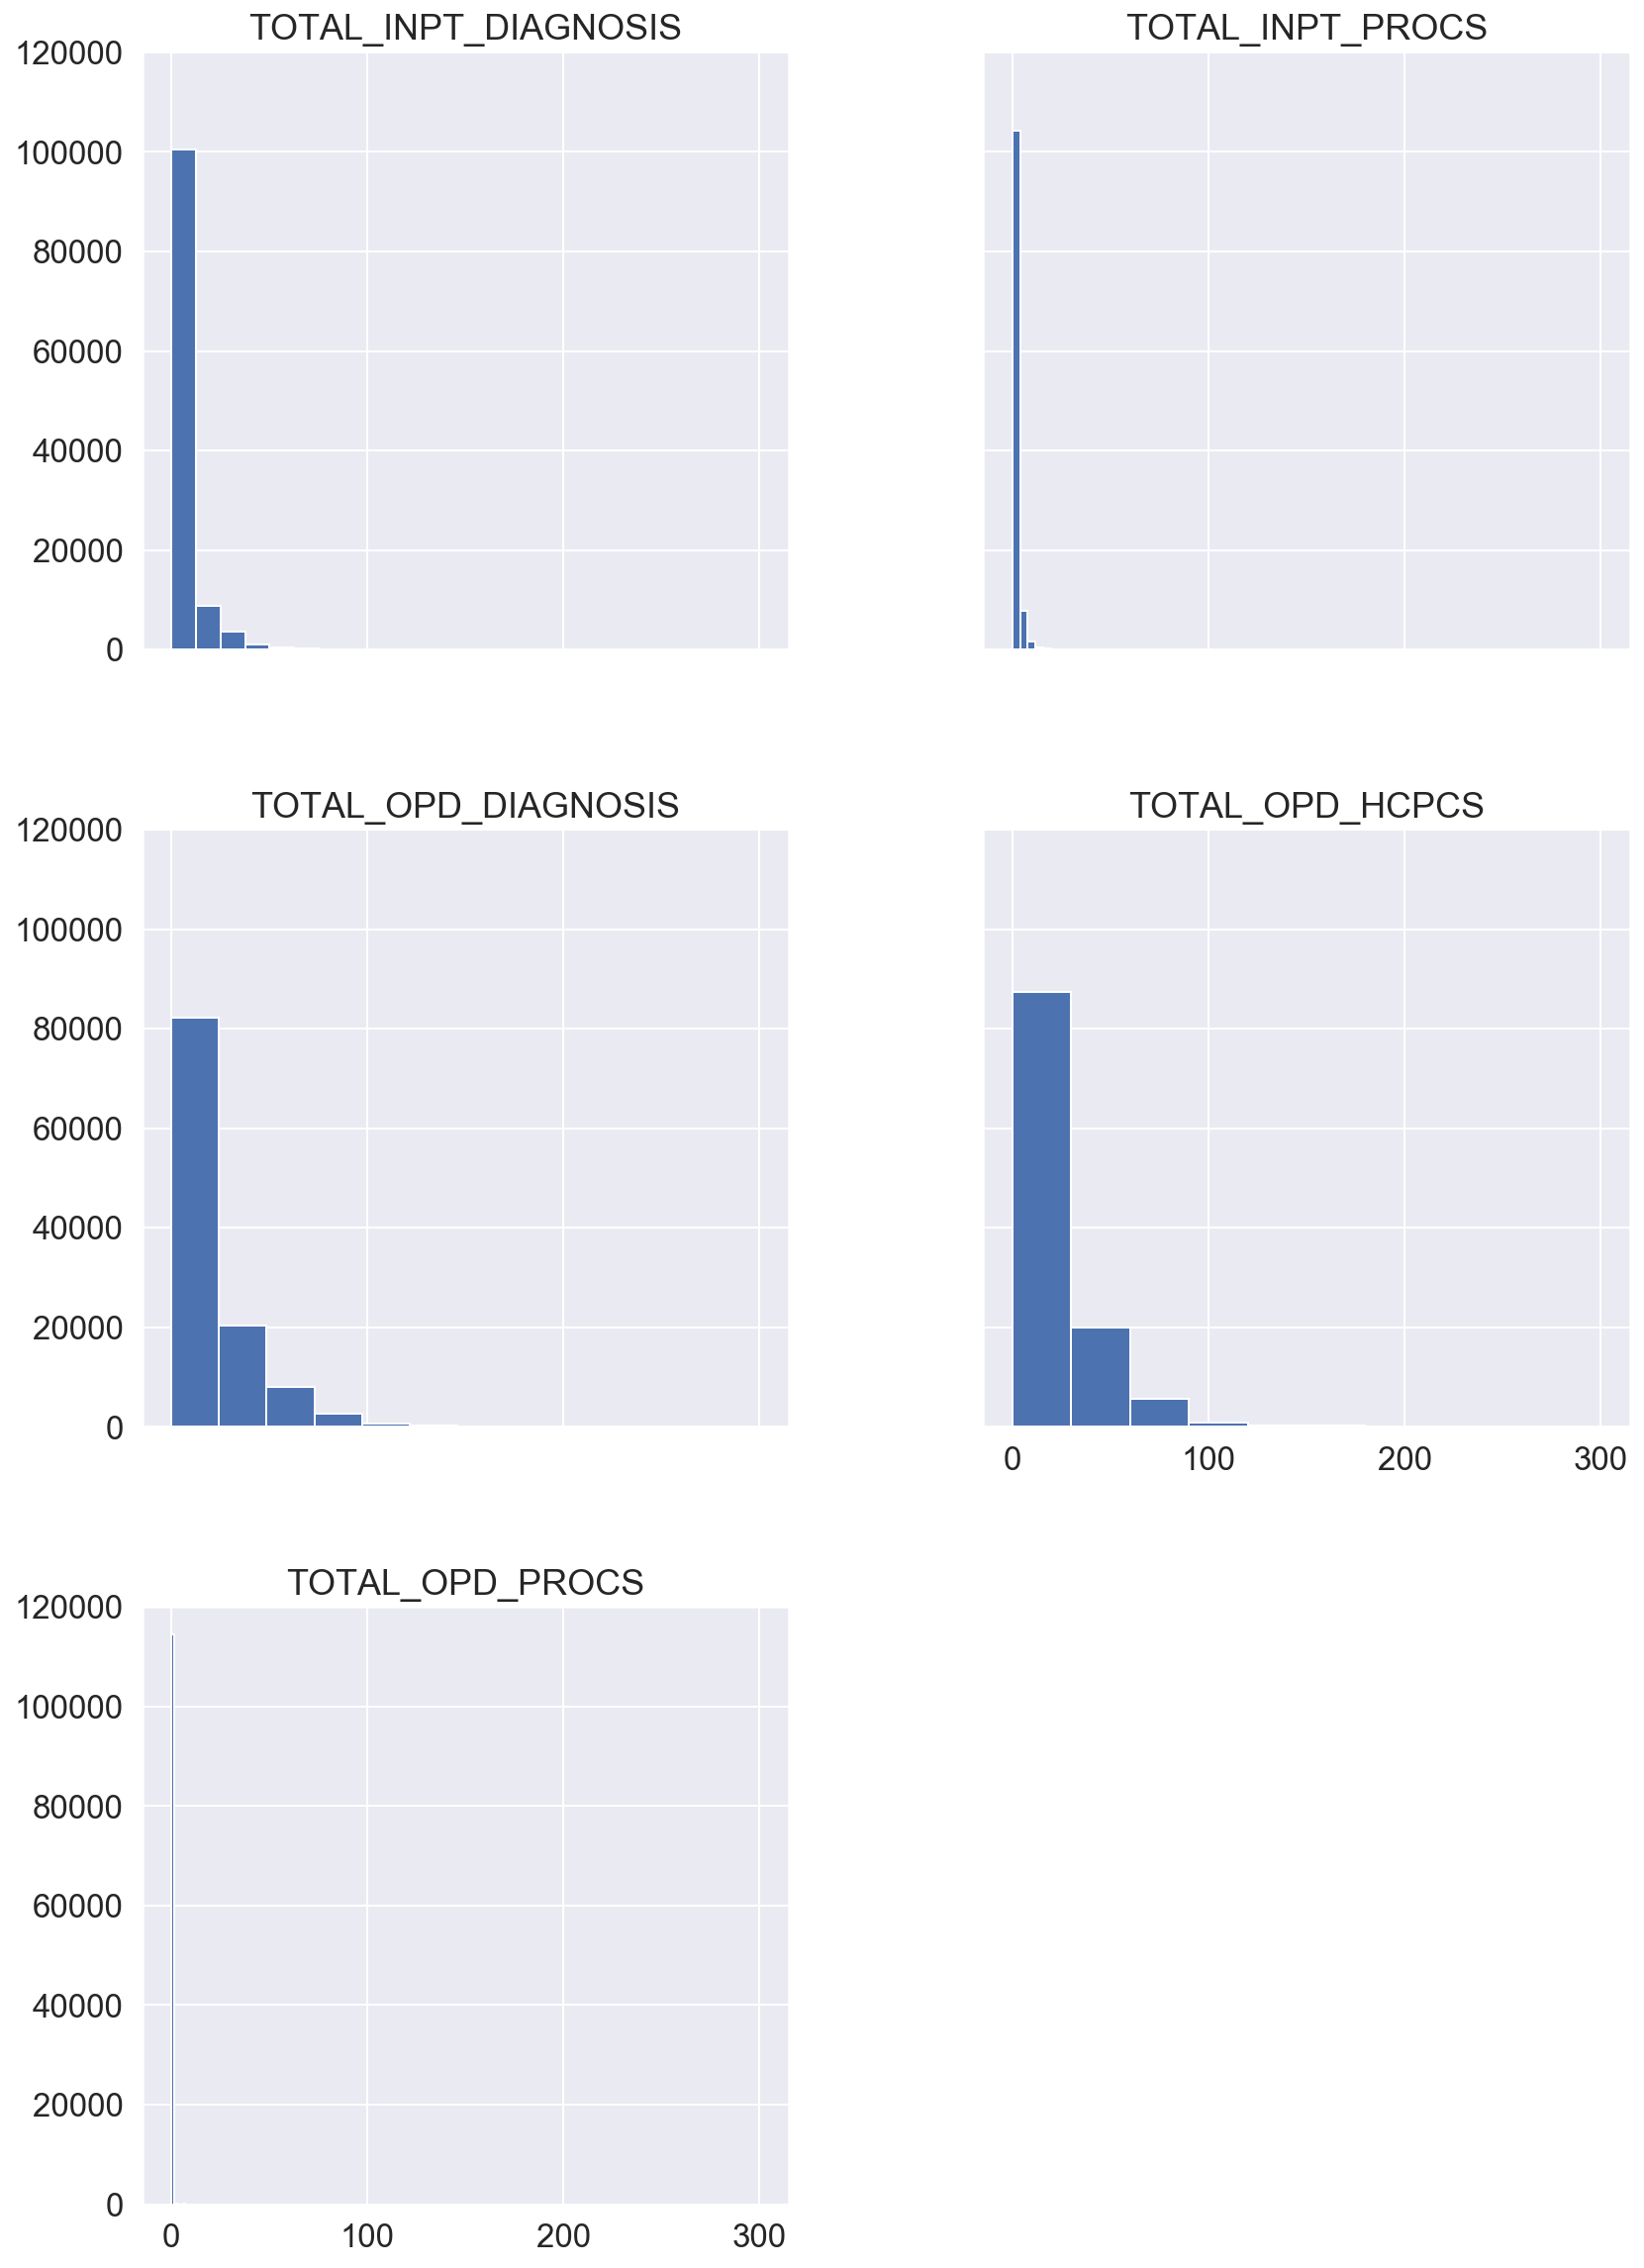

In [36]:
df[['TOTAL_INPT_DIAGNOSIS','TOTAL_INPT_PROCS', 
                                   'TOTAL_OPD_DIAGNOSIS','TOTAL_OPD_PROCS',
                                   'TOTAL_OPD_HCPCS',]].hist(figsize=(12,20), sharex=True, sharey=True) #bins=10
plt.show()  #  'NUM_OPD_VISIT'

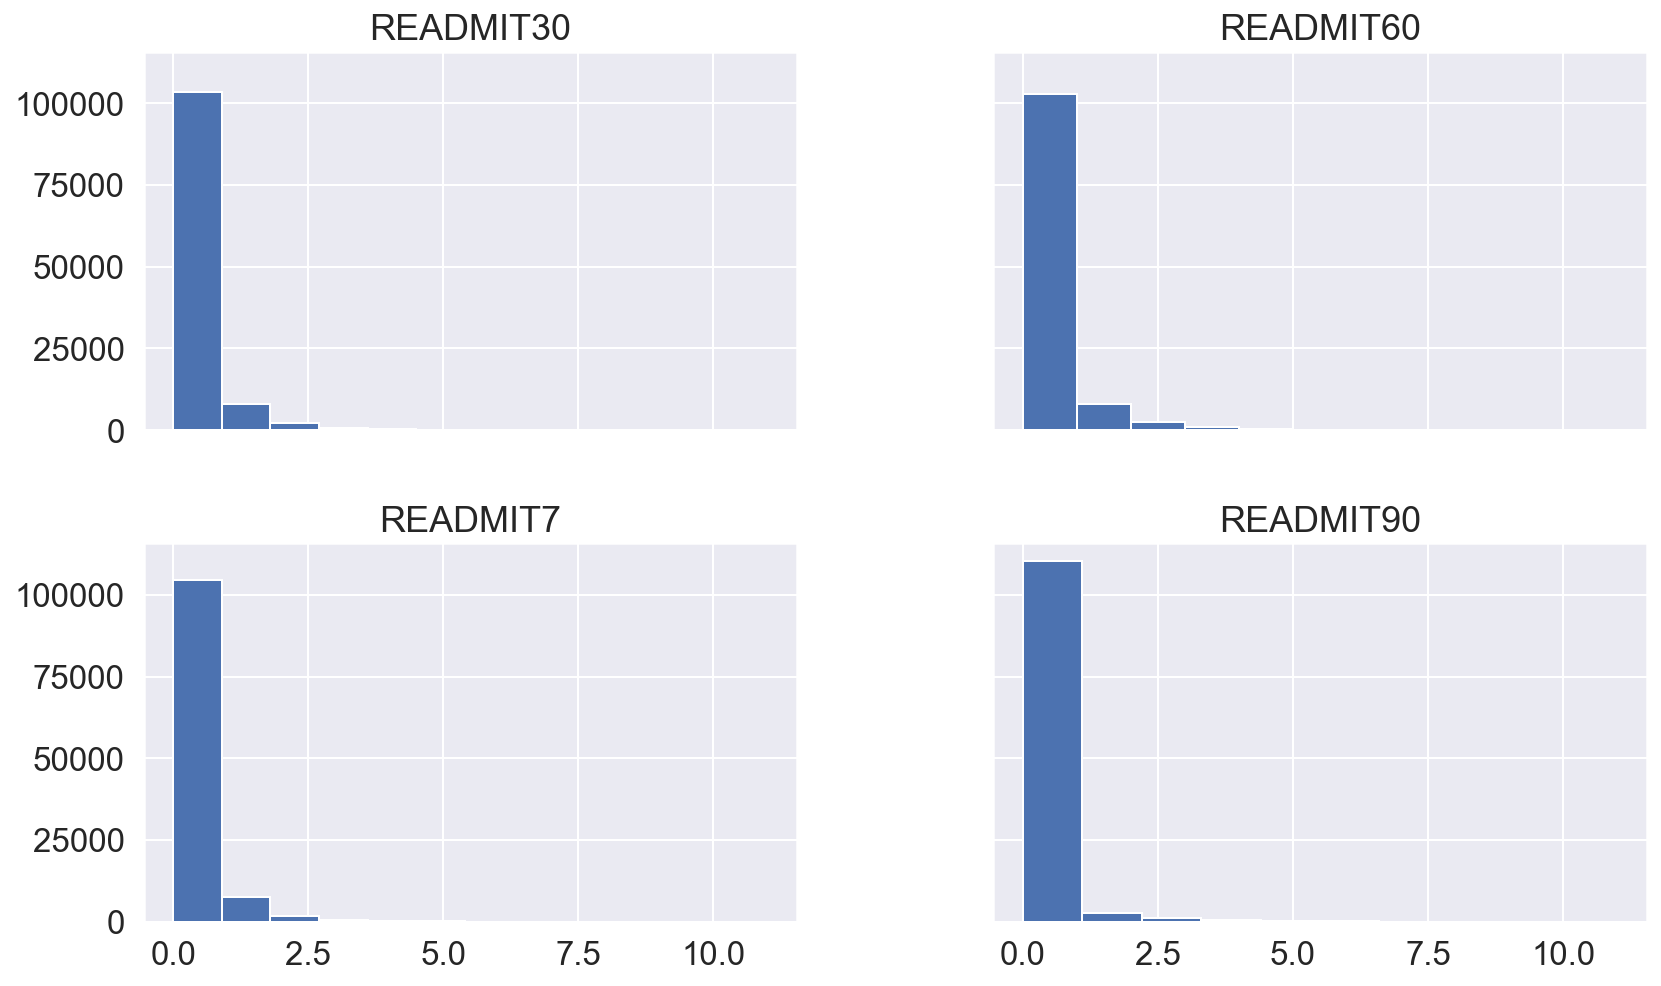

In [37]:
df[['READMIT7','READMIT30','READMIT60','READMIT90']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

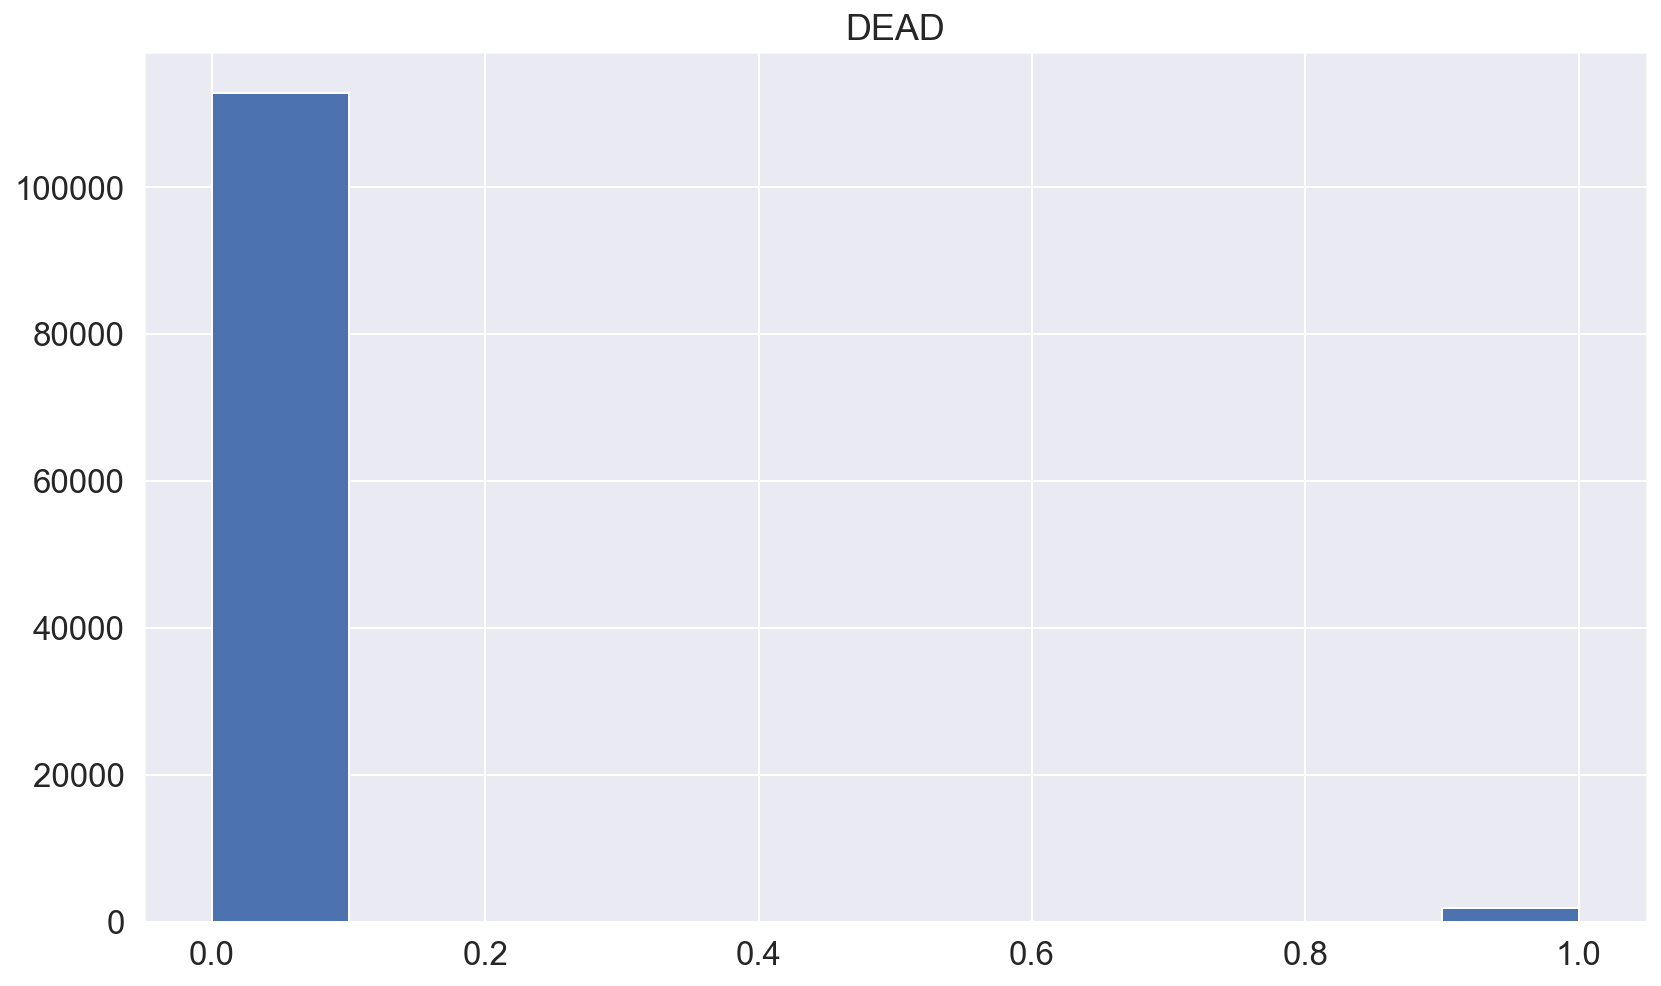

In [38]:
df[['DEAD']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

### Looking for corelation between the variables

In [9]:
corr = df.corr()
corr

BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
BENE_SEX_IDENT_CD              1.000000     -0.002014             0.010620   
BENE_RACE_CD                  -0.002014      1.000000            -0.010043   
END_STAGE_RENAL2008            0.010620     -0.010043             1.000000   
END_STAGE_RENAL2009            0.012348     -0.012050             0.223199   
SP_ALZHDMTA2008               -0.028000      0.018841            -0.181248   
SP_ALZHDMTA2009               -0.029205      0.021716            -0.157829   
SP_CHF2008                    -0.029833      0.028560            -0.248140   
SP_CHF2009                    -0.030813      0.033484            -0.213401   
SP_CHRNKIDN2008               -0.019849      0.021986            -0.444004   
SP_CHRNKIDN2009               -0.022963      0.020971            -0.255058   
SP_CNCR2008                   -0.003268      0.022071            -0.097296   
SP_CNCR2009                   -0.001630      0.025387            -0.074324   
SP_COPD2008                   -0.019019      0.017502            -0.213796   
SP_COPD2009                   -0.022936      0.019224            -0.179359   
SP_DEPRESSN2008               -0.034689      0.013334            -0.165446   
SP_DEPRESSN2009               -0.034278      0.018506            -0.146703   
SP_DIABETES2008               -0.041289      0.034334            -0.239939   
SP_DIABETES2009               -0.039473      0.036305            -0.213996   
SP_ISCHMCHT2008               -0.034930      0.043116            -0.223525   
SP_ISCHMCHT2009               -0.032901      0.044464            -0.193890   
SP_OSTEOPRS2008               -0.031519      0.023292            -0.114852   
SP_OSTEOPRS2009               -0.029518      0.026563            -0.092001   
SP_RA_OA2008                  -0.027536      0.025768            -0.139138   
SP_RA_OA2009                  -0.024659      0.026291            -0.117129   
SP_STRKETIA2008               -0.008198      0.009768            -0.153895   
TOTAL_DIAGNOSIS2008            0.046593     -0.042165             0.352498   
TOTAL_DIAGNOSIS2009            0.046907     -0.047135             0.289345   
TOTAL_PAYMENT2008              0.012576     -0.022515             0.344924   
TOTAL_PAYMENT2009              0.019875     -0.023577             0.259135   
CHANGE_IN_PAYMEMT              0.004363      0.002065            -0.115592   
CHANGE_IN_DIAGNOSIS            0.002254     -0.008939            -0.079428   
DEAD                          -0.001399     -0.001170             0.001674   
AGE                            0.108223     -0.076374             0.027200   
LOS                           -0.001133     -0.000440            -0.001738   
NUM_INPT_ADM                   0.000725     -0.000242            -0.000299   
TOTAL_INPT_COST                0.000028      0.000385             0.001185   
TOTAL_INPT_DIAGNOSIS           0.000635     -0.000435            -0.000333   
TOTAL_INPT_PROCS               0.000725     -0.001103             0.000067   
READMIT7                       0.000334     -0.000129             0.000473   
READMIT30                      0.000929      0.000252             0.000675   
READMIT60                      0.001020     -0.000014             0.001184   
READMIT90                      0.001244     -0.000274             0.001143   
NUM_OPD_VISIT                 -0.001004     -0.001168             0.000940   
TOTAL_OPD_COST                -0.001002      0.000448             0.001515   
TOTAL_OPD_DIAGNOSIS           -0.001108     -0.000716             0.001129   
TOTAL_OPD_PROCS                0.001997      0.001562            -0.002804   
TOTAL_OPD_HCPCS               -0.000744     -0.000585             0.000962   
TOTAL_QTY_DSPNSD_NUM          -0.001632     -0.002232            -0.000249   
PTNT_PAY_RX_AMT               -0.001358     -0.002353            -0.000565   
TOT_RX_CST_AMT                -0.002229     -0.002124            -0.000759   
READMIT7_FLAG                  0.000830     

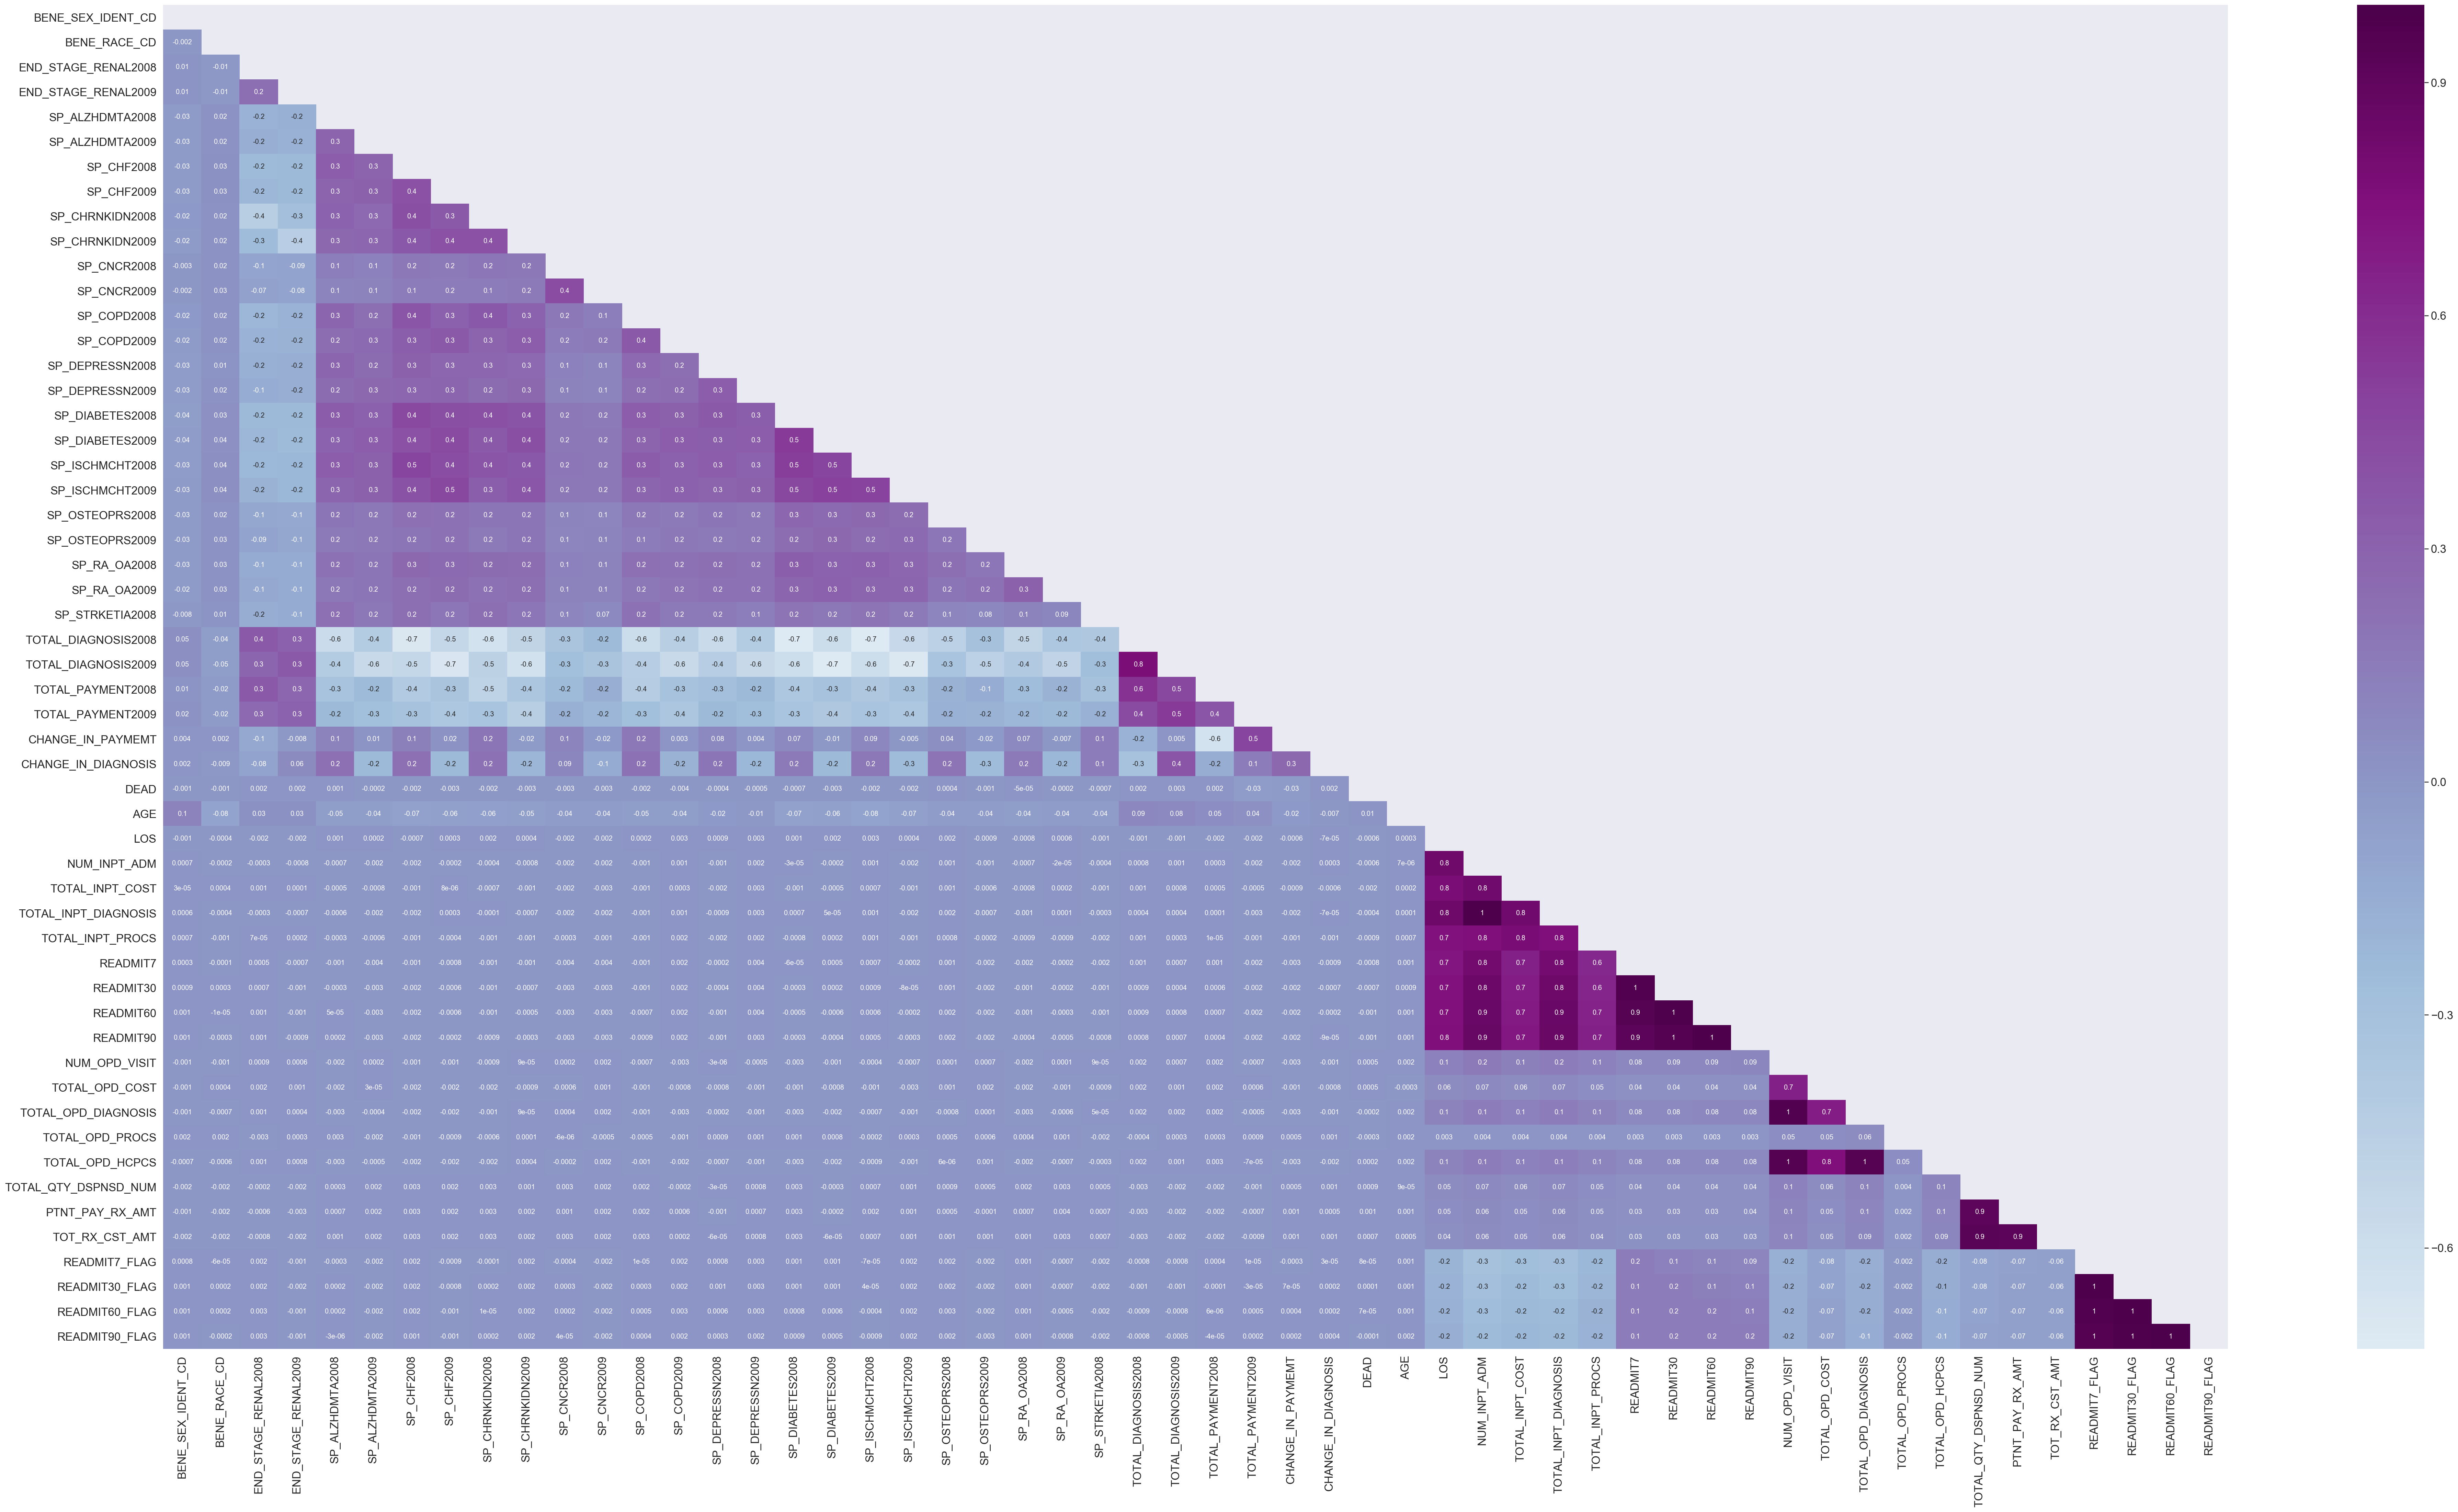

In [10]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

#### Correlation of predcitor variable against the target variables

In [19]:
corr1 = df.corr()['READMIT30_FLAG'][:] # 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90'
corr_target = corr1.sort_values(ascending=False)
corr_target

READMIT30_FLAG          1.000000
READMIT60_FLAG          0.985010
READMIT7_FLAG           0.981592
READMIT90_FLAG          0.974021
READMIT30               0.154081
                          ...   
TOTAL_INPT_PROCS       -0.204151
PCA1                   -0.224226
TOTAL_INPT_COST        -0.245508
TOTAL_INPT_DIAGNOSIS   -0.264068
NUM_INPT_ADM           -0.279126
Name: READMIT30_FLAG, Length: 554, dtype: float64

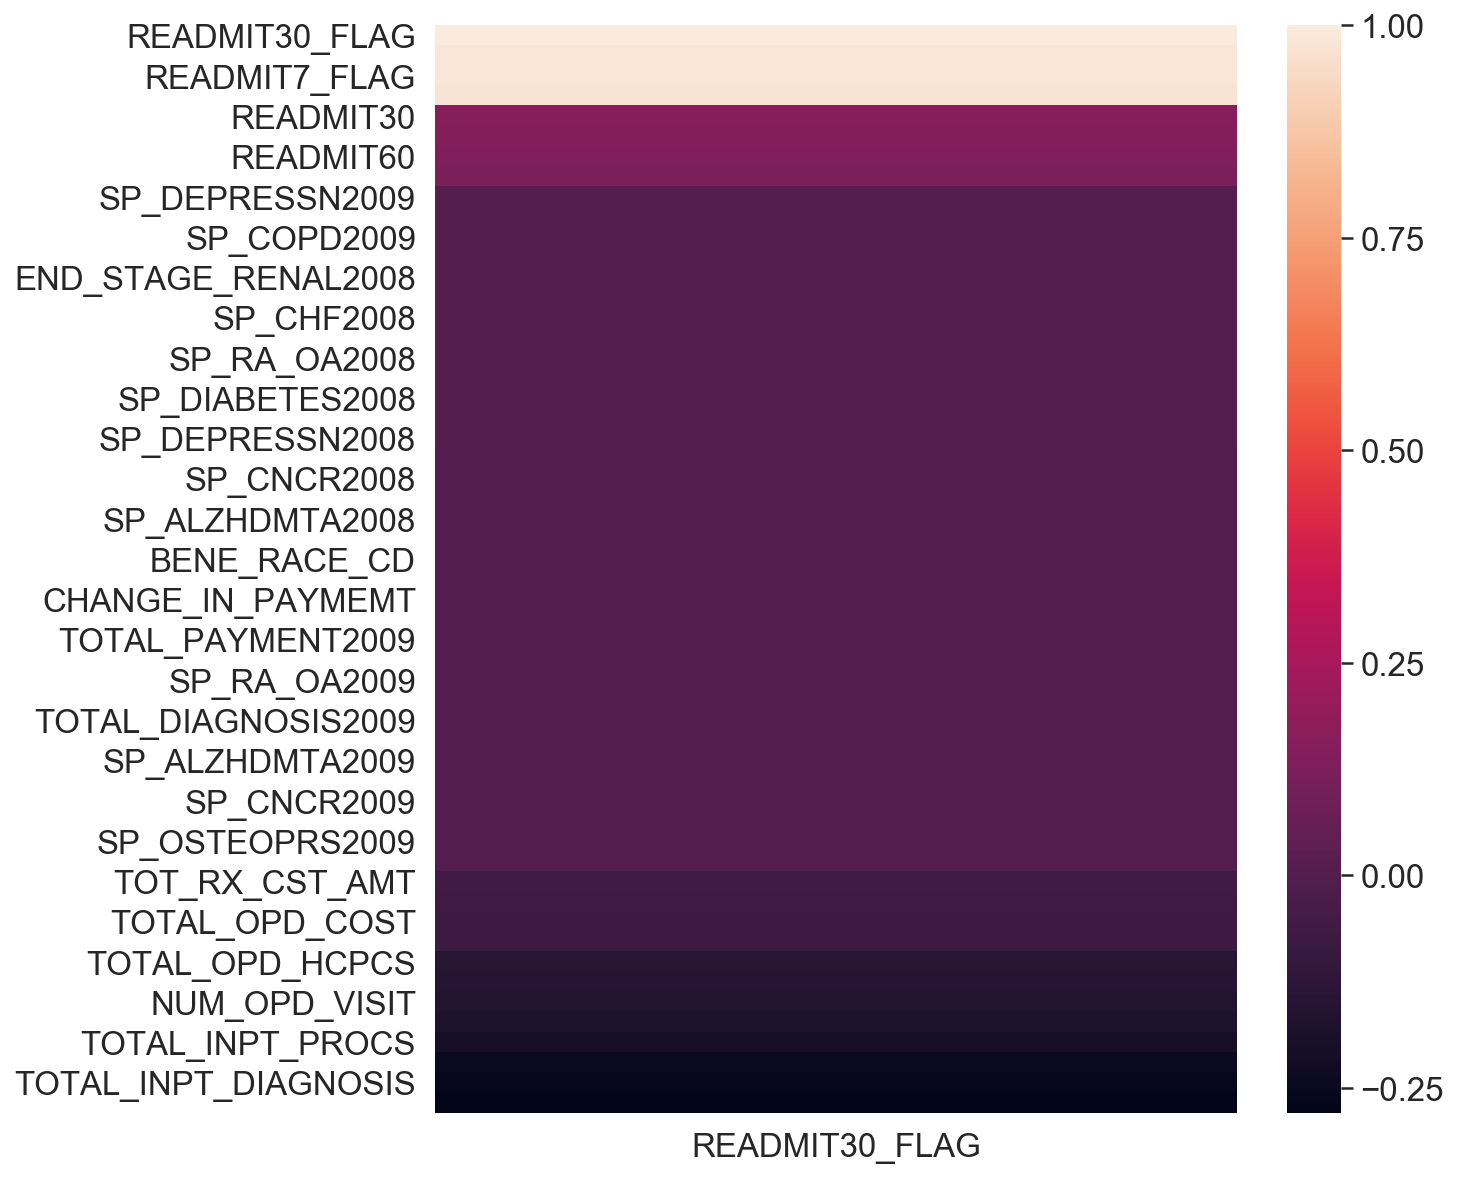

In [13]:
corr_target_df=pd.DataFrame(corr_target)
fig, ax = plt.subplots(figsize=(8,10 ))
sns.heatmap(corr_target_df);

### Feature selection (excuding string summation of ICDs and features which are showing colinearity etc.)

In [20]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 30, 4, 881914)

In [12]:
df_selected = df[['DESYNPUF_ID','BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',
       'PTNT_PAY_RX_AMT', 'TOT_RX_CST_AMT', 'READMIT30_FLAG']].copy()   # , 'DEAD'
print(df_selected.shape)
df_selected.head(2)  
# 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',

(458328, 47)


DESYNPUF_ID  BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
0  00000B48BCF4AD29                  2             5                    0   
1  0000141F2FECE9BC                  2             1                    0   

   END_STAGE_RENAL2009  SP_ALZHDMTA2008  SP_ALZHDMTA2009  SP_CHF2008  \
0                    0                1                1           1   
1                    0                2                2           2   

   SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  SP_CNCR2008  SP_CNCR2009  \
0           1                1                2            1            2   
1           2                2                2            2            2   

   SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  SP_DEPRESSN2009  \
0            2            2                1                1   
1            2            2                2                1   

   SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  SP_ISCHMCHT2009  \
0                1                1                1                1   
1                2                2                2                2   

   SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  SP_RA_OA2009  \
0                1                1             2             2   
1                2                2             2             2   

   SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0                1                    9                    6   
1                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS   AGE               LOS  NUM_INPT_ADM  TOTAL_INPT_COST  \
0                   -3  86.0  2419200000000000           3.0          84072.0   
1                    1  35.0   172800000000000           1.0           5108.0   

   TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0                  27.0              11.0           10.0          3210.0   
1                   9.0               1.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  READMIT30_FLAG  
0                 210.0             10.0           200.0               1  
1                9930.0           1740.0         13490.0               0

In [22]:
'''df_selected = df_selected.merge(df_ICD_codes_vectorized_pca, on='DESYNPUF_ID', how='inner', left_index=True, right_index=True)
print(df_selected.shape)
df_selected.head(2)'''

(458328, 547)


DESYNPUF_ID  BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
0  00000B48BCF4AD29                  2             5                    0   
1  0000141F2FECE9BC                  2             1                    0   

   END_STAGE_RENAL2009  SP_ALZHDMTA2008  SP_ALZHDMTA2009  SP_CHF2008  \
0                    0                1                1           1   
1                    0                2                2           2   

   SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  SP_CNCR2008  SP_CNCR2009  \
0           1                1                2            1            2   
1           2                2                2            2            2   

   SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  SP_DEPRESSN2009  \
0            2            2                1                1   
1            2            2                2                1   

   SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  SP_ISCHMCHT2009  \
0                1                1                1                1   
1                2                2                2                2   

   SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  SP_RA_OA2009  \
0                1                1             2             2   
1                2                2             2             2   

   SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0                1                    9                    6   
1                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS   AGE               LOS  NUM_INPT_ADM  TOTAL_INPT_COST  \
0                   -3  86.0  2419200000000000           3.0          84072.0   
1                    1  35.0   172800000000000           1.0           5108.0   

   TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0                  27.0              11.0           10.0          3210.0   
1                   9.0               1.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  READMIT30_FLAG  \
0                 210.0             10.0           200.0               1   
1                9930.0           1740.0         13490.0               0   

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  3.625634 -0.786301 -0.946801 -0.030245  1.129191  1.762411  0.205516   
1  4.311950 -0.287842  2.210472 -1.933581  1.798780  0.800790 -0.359583   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.688384  0.343620 -0.572614 -0.414013  1.324290 -1.096321  0.053538   
1 -0.369305  1.352232 -0.148075  0.303799  0.781164 -0.493005  0.687498   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0  1.403125 -0.839170 -0.478983 -0.339575  0.693785  0.100106 -0.464426   
1 -0.597395  1.643601  0.700513  0.829547  0.580763 -0.666055  0.072543   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  \
0  0.070825  0.182432 -0.146545  0.993364 -1.350006  0.354650  0.194013   
1 -0.678061 -0.221133 -0.063387  0.310939  0.532719 -0.304891 -0.589432   

      PCA29     PCA30     PCA31     PCA32     PCA33     PCA34     PCA35  \
0 -0.756281 -0.001135 -0.107875  0.637469 -0.104751 -0.083831  0.048040   
1 -0.315004 -0.356705  0.804796  0.001545 -0.392707 -0.153421  0.567619   

      PCA36     PCA37     PCA38     PCA39     PCA40     PCA41     PCA42  \
0  0.485905 -0.228439 -0.170822  0.193776 -0.243370 -0.125656 -0.286858   
1 -0.225773  0.437782  0.224154  0.721464 -0.031626  1.872665 -0.042057   

      PCA43     PCA44     PCA45     PCA46     PCA47     PCA48     PCA49  \
0  0.333452 -0.

In [23]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 30, 20, 300600)

In [13]:
# popping out Pt Id as it is not required
df_selected.pop('DESYNPUF_ID')
print(df_selected.shape)
df_selected.head(2)

(458328, 46)


BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  \
0                  2             5                    0                    0   
1                  2             1                    0                    0   

   SP_ALZHDMTA2008  SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  \
0                1                1           1           1                1   
1                2                2           2           2                2   

   SP_CHRNKIDN2009  SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  \
0                2            1            2            2            2   
1                2            2            2            2            2   

   SP_DEPRESSN2008  SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  \
0                1                1                1                1   
1                2                1                2                2   

   SP_ISCHMCHT2008  SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  \
0                1                1                1                1   
1                2                2                2                2   

   SP_RA_OA2008  SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  \
0             2             2                1                    9   
1             2             2                2                    0   

   TOTAL_DIAGNOSIS2009  TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  \
0                    6            93452.0             8750.0   
1                    1                0.0             5308.0   

   CHANGE_IN_PAYMEMT  CHANGE_IN_DIAGNOSIS   AGE               LOS  \
0           -84702.0                   -3  86.0  2419200000000000   
1             5308.0                    1  35.0   172800000000000   

   NUM_INPT_ADM  TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  \
0           3.0          84072.0                  27.0              11.0   
1           1.0           5108.0                   9.0               1.0   

   NUM_OPD_VISIT  TOTAL_OPD_COST  TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  \
0           10.0          3210.0                 27.0              0.0   
1           30.0          7870.0                 99.0              0.0   

   TOTAL_OPD_HCPCS  TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0             47.0                 210.0             10.0           200.0   
1             67.0                9930.0           1740.0         13490.0   

   READMIT30_FLAG  
0               1  
1               0

In [36]:
#df_selected.dtypes

In [ ]:
# Check if and who got readmiited 8 times

### Selecting Predictor and Target Variables

In [14]:
y = df_selected.pop('READMIT30_FLAG')  #df_selected.pop('DEAD') 
X = df_selected  

print(X.shape)
print(y.shape)

(458328, 45)
(458328,)


### Checking for baseline accuracy

In [15]:
y.value_counts(normalize=True)

1    0.773832
0    0.226168
Name: READMIT30_FLAG, dtype: float64

#### Since the dataset doesn't seem to be too imbalance, over or under sampling isn't required

### Train - Test split

In [16]:
# Creating Train, test split with Target variable for fixed features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y ) #, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(366662, 45)
(366662,)
(91666, 45)
(91666,)


#### Standardize the data

In [17]:
# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Principal Component Analysis to select important features and remove any colinear features

In [18]:
datetime.now()

datetime.datetime(2020, 5, 13, 12, 27, 56, 68629)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)

# PCA fit-tranform on train data
X_train_pca = pca.fit_transform(X_train)

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_col_dict) 
print(X_train_pca.shape)

# PCA tranform on test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_col_dict) 

print(X_test_pca.shape)

X_train_pca.head(2)

(366662, 28)
(91666, 28)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.757787  3.371179  7.682122  2.354712  1.528672 -0.608761  0.511872   
1 -0.902208  4.083343 -0.419289  1.752928 -1.541402  0.089564 -1.813101   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0  0.498529  0.080528 -0.752475 -0.524271  0.694437  0.962907 -0.582719   
1  2.062422 -0.494605 -0.418822  0.334060 -0.911415 -0.678440  1.737151   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0 -0.065509 -0.115459  0.047776  0.152109 -0.510025 -0.183565  0.064794   
1 -0.775374 -0.748364  1.936993 -0.524483  0.110466  0.661402  0.012119   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  
0  0.582156  0.912145 -0.263641  0.809609 -1.177867  0.852559  0.366773  
1 -0.262066 -0.377947  0.270133 -0.877365  0.480924  2.378849  0.283957

In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

array([0.2008372 , 0.30249123, 0.37566542, 0.43611352, 0.49091597,
       0.52169735, 0.55070129, 0.5790444 , 0.60393549, 0.62635182,
       0.64846912, 0.67049973, 0.69026967, 0.70973148, 0.72867647,
       0.74728901, 0.7658262 , 0.78385003, 0.80100624, 0.81771565,
       0.8328166 , 0.84739244, 0.86166912, 0.87533555, 0.88829994,
       0.9012065 , 0.9137817 , 0.92594556])

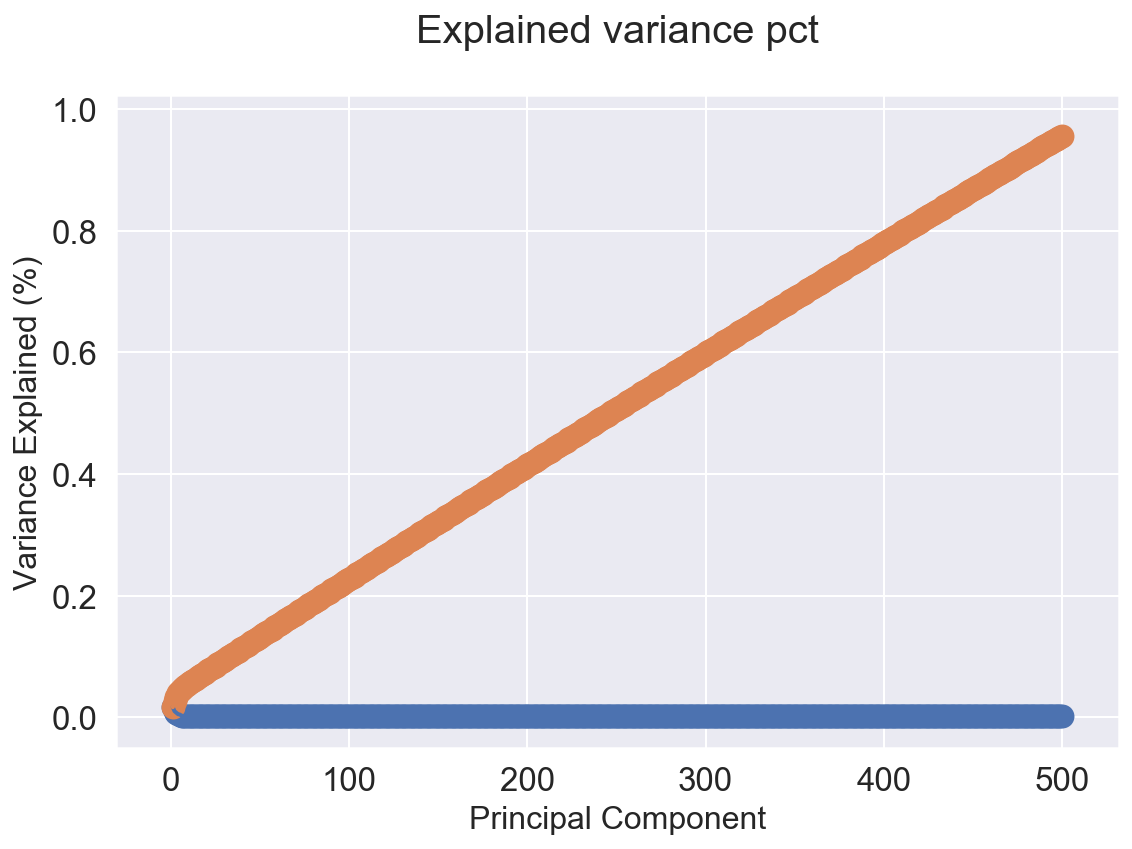

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, explained_variance, lw=2)
ax.scatter(x_values, explained_variance, s=120)
ax.plot(x_values, np.cumsum(explained_variance), lw=2)
ax.scatter(x_values, np.cumsum(explained_variance), s=120)
#ax.plot(x_values,0.9)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

#### We select 32 PCA's which return 95% of variance  (28 PCA return 90% variance)

In [96]:
'''
Xpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if 'PCA' in col], disciplines]

fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Xpca_corr)
ax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',  
'''

'\nXpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if \'PCA\' in col], disciplines]\n\nfig, ax = plt.subplots(figsize=(60,36))\nmatrix = np.triu(Xpca_corr)\nax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt=\'.1g\'); #cmap= \'coolwarm\',  \n'

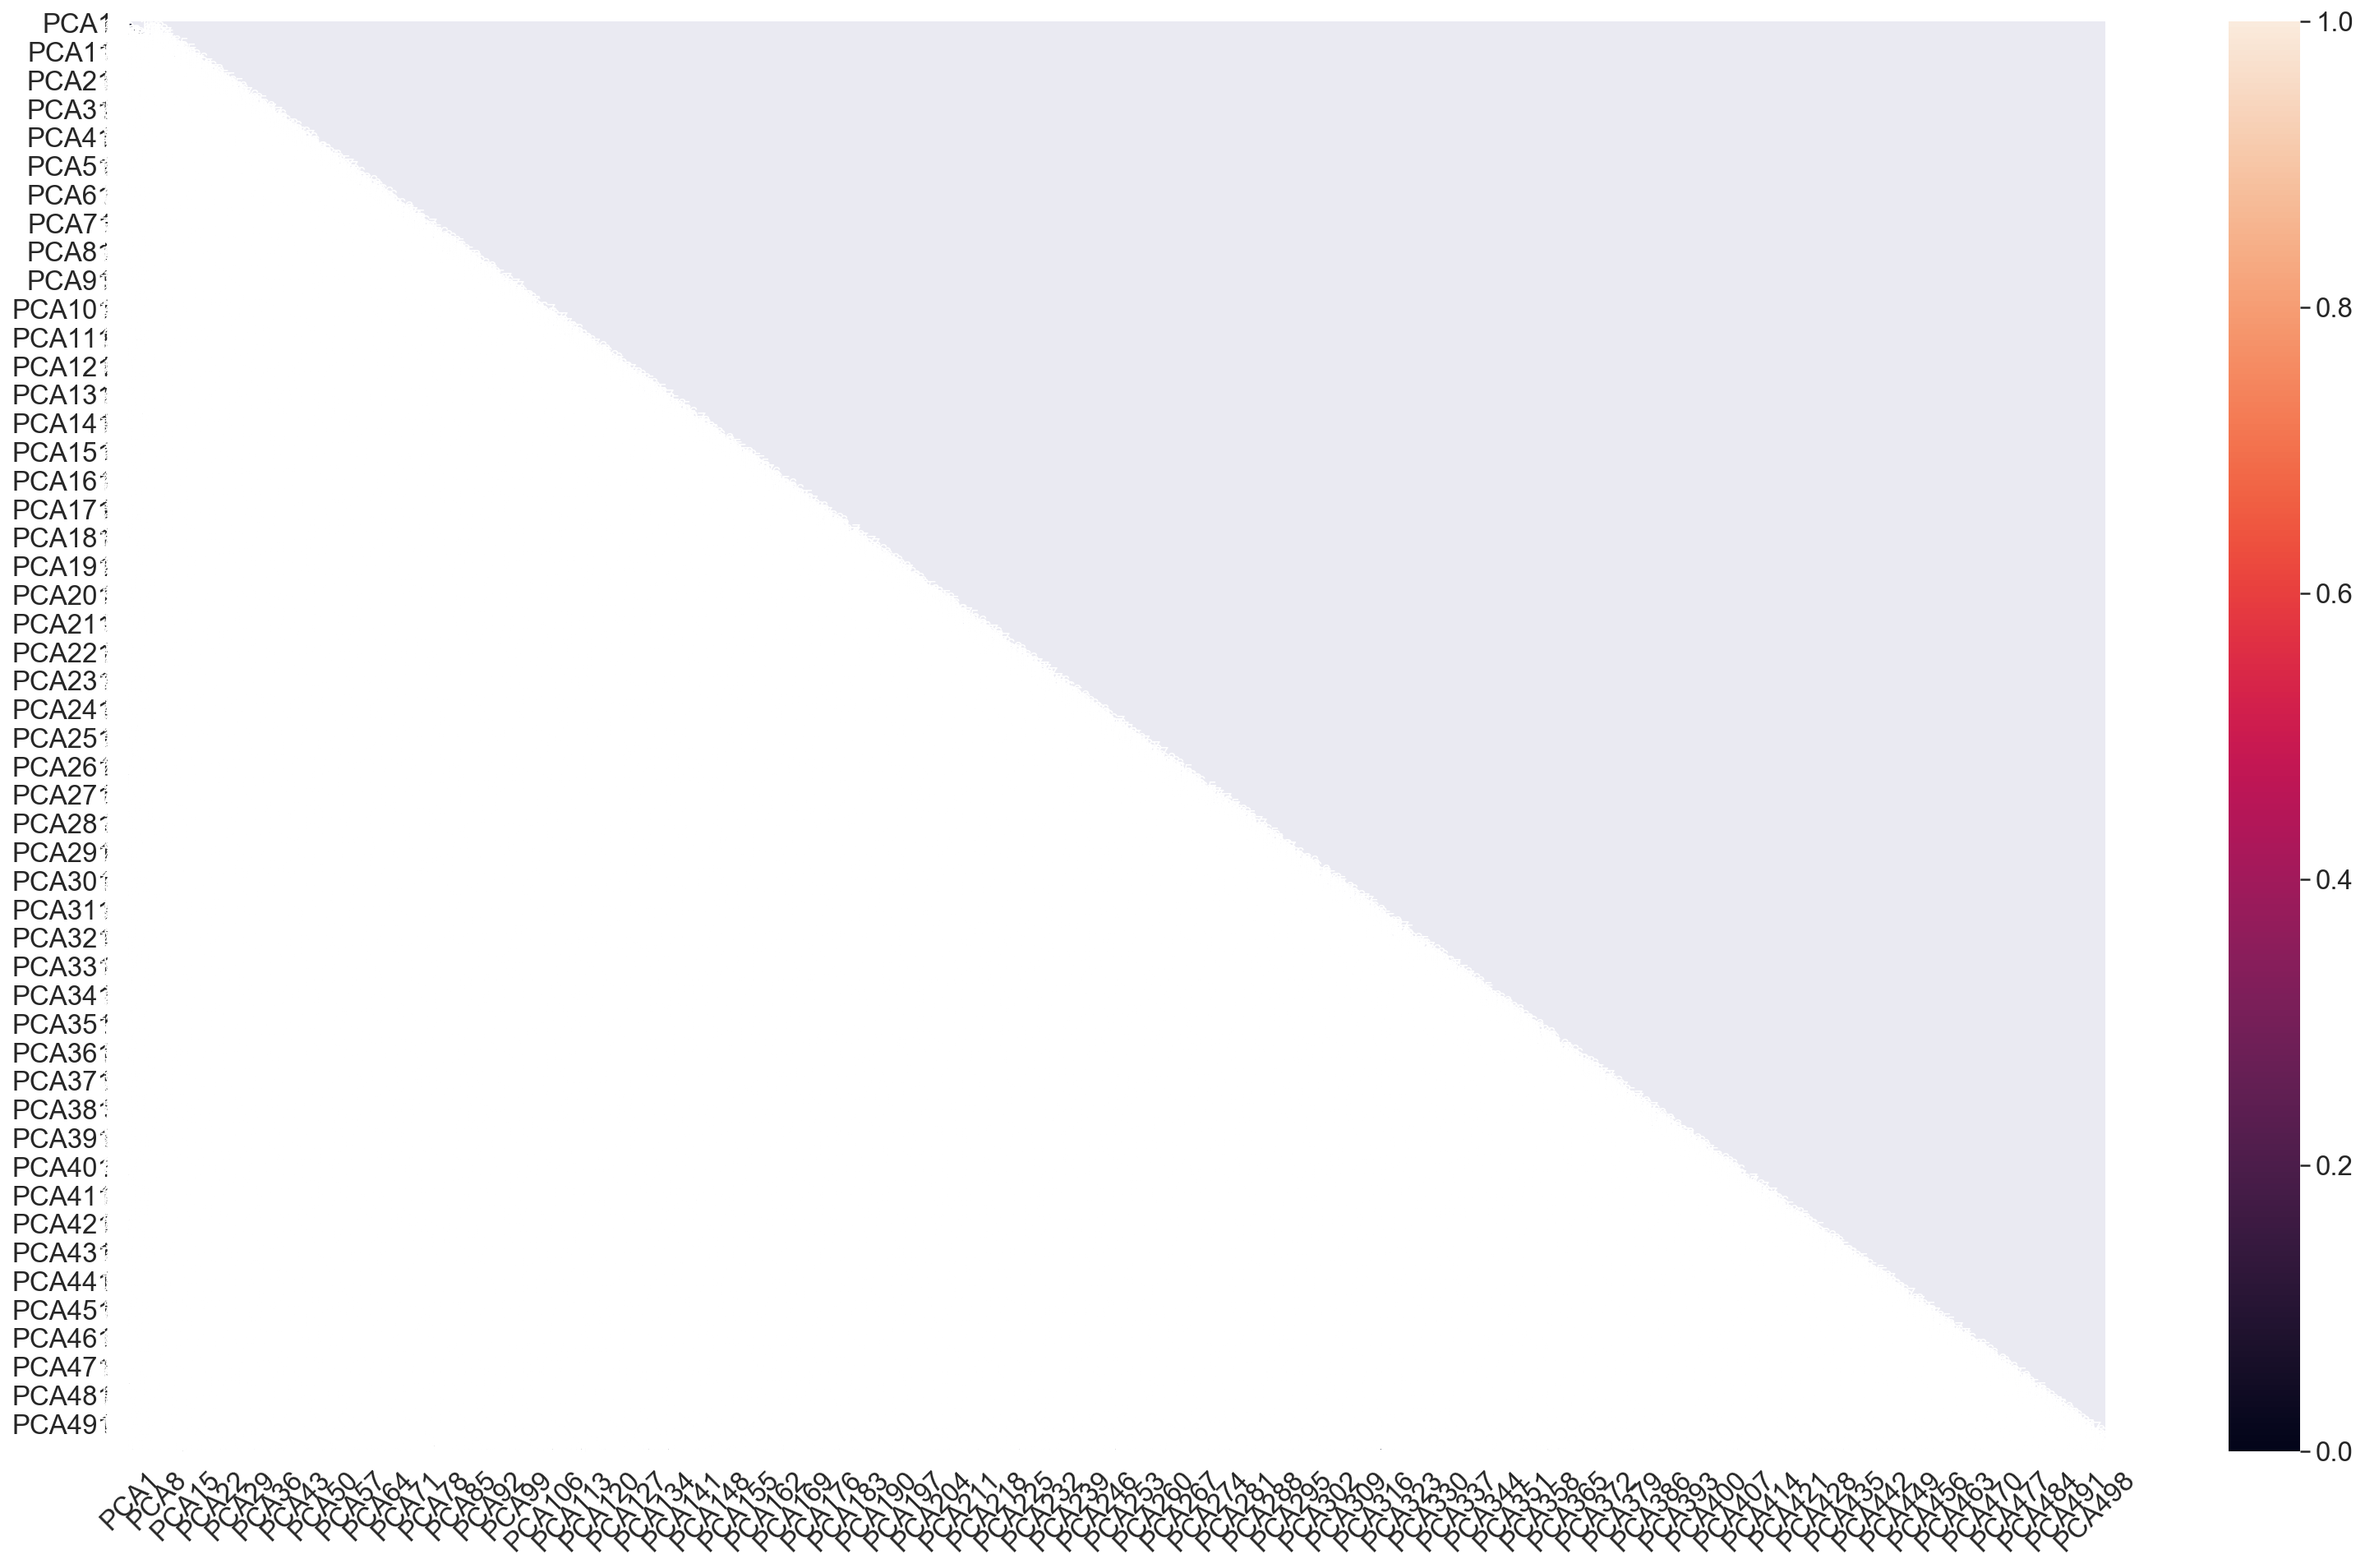

In [49]:
X_train_pca_corr = X_train_pca.corr()

mask = np.zeros_like(X_train_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_train_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_train_pca_corr.shape[1], 0)
plt.show()

In [ ]:
X_test_pca_corr = X_test_pca.corr()

mask = np.zeros_like(X_test_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_test_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_test_pca_corr.shape[1], 0)
plt.show()

KeyboardInterrupt: 

### Building basic Logistic Regression model for readmission prediction

In [42]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 40, 28, 559760)

In [43]:
modelLR = LogisticRegression()
modelLR.fit(X_train_pca,y_train)
datetime.now()

datetime.datetime(2020, 5, 12, 20, 40, 47, 73092)

In [44]:
print("Score(Train): ", modelLR.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelLR, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelLR.score(X_test_pca, y_test))

Score(Train):  0.7444267472495104
Cross Val Score (Train):  0.7440149244099337
Score (Test):  0.7438199550542186


In [45]:
datetime.now()

datetime.datetime(2020, 5, 12, 20, 42, 15, 216410)

In [20]:
importance = modelLR.coef_[0]

importanceDF = pd.DataFrame(importance, index=X_train_pca.columns, columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(15)

Importance
PCA11    0.020579
PCA14    0.013042
PCA4     0.012176
PCA18    0.010234
PCA10    0.009061
PCA23    0.007552
PCA16    0.006159
PCA6     0.005988
PCA13    0.005519
PCA24    0.004843
PCA21    0.003528
PCA8     0.003011
PCA28    0.002782
PCA27    0.001343
PCA12    0.001275

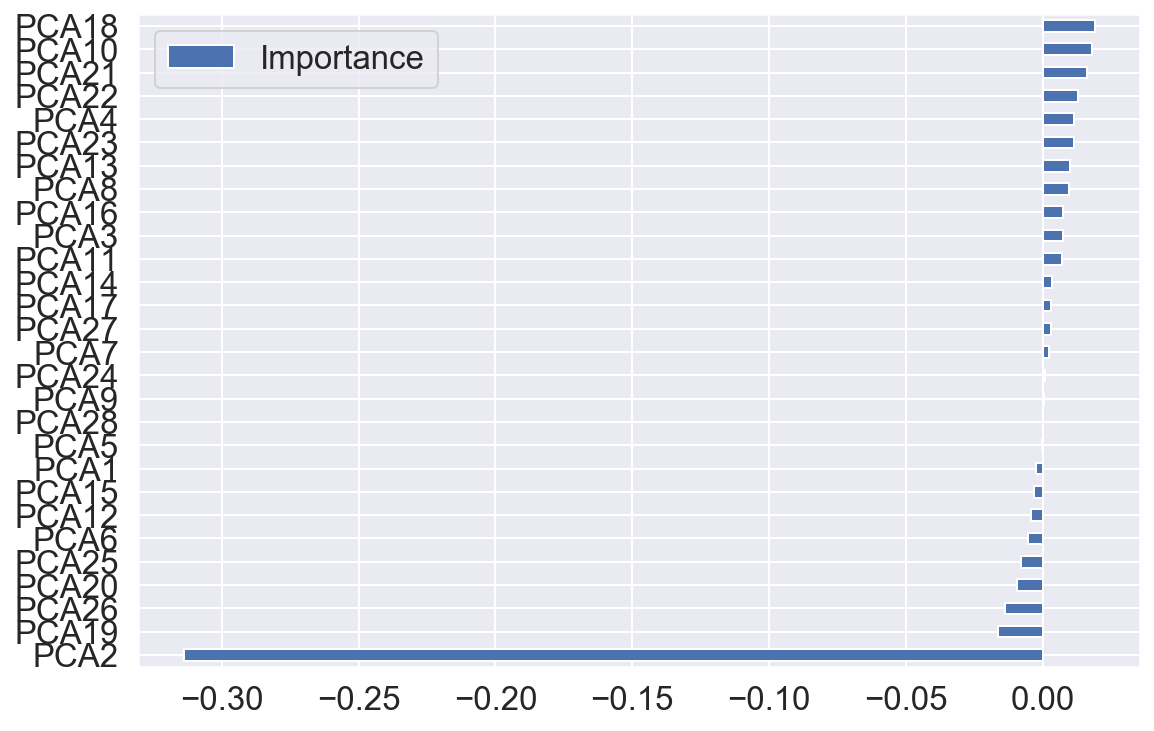

In [28]:
importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
plt.show()

In [21]:
#print(pca.inverse_transform(X_train_pca)) 

[[ 0.89320386 -0.37572932 -0.28294347 ...  1.63000802  1.64078334
   1.65810896]
 [ 0.89392696  0.94458398 -0.2838599  ...  0.44663154  0.44942978
   0.45210156]
 [-1.11891083 -0.38092807 -0.01025553 ... -0.81007142 -0.81002567
  -0.80214171]
 ...
 [-1.11780107 -0.37740109 -0.28321045 ...  1.33716604  1.32524751
   1.33033318]
 [ 0.89487569 -0.37774418 -0.28422578 ... -0.62637775 -0.64681351
  -0.66364804]
 [-1.11590327 -0.37123508 -0.2391738  ... -0.81744965 -0.80080017
  -0.80535978]]


In [51]:
# Predictons and Probabilities

predictions_LRBase = modelLR.predict(X_test_pca)
#predictions_LRBase

probabilities_LRBase = modelLR.predict_proba(X_test_pca)
#probabilities_LRBase

In [52]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                        923                   19809
True_Readmissions                          3674                   67260

In [53]:
print(classification_report(y_test, predictions_LRBase))

              precision    recall  f1-score   support

           0       0.20      0.04      0.07     20732
           1       0.77      0.95      0.85     70934

    accuracy                           0.74     91666
   macro avg       0.49      0.50      0.46     91666
weighted avg       0.64      0.74      0.68     91666



In [54]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

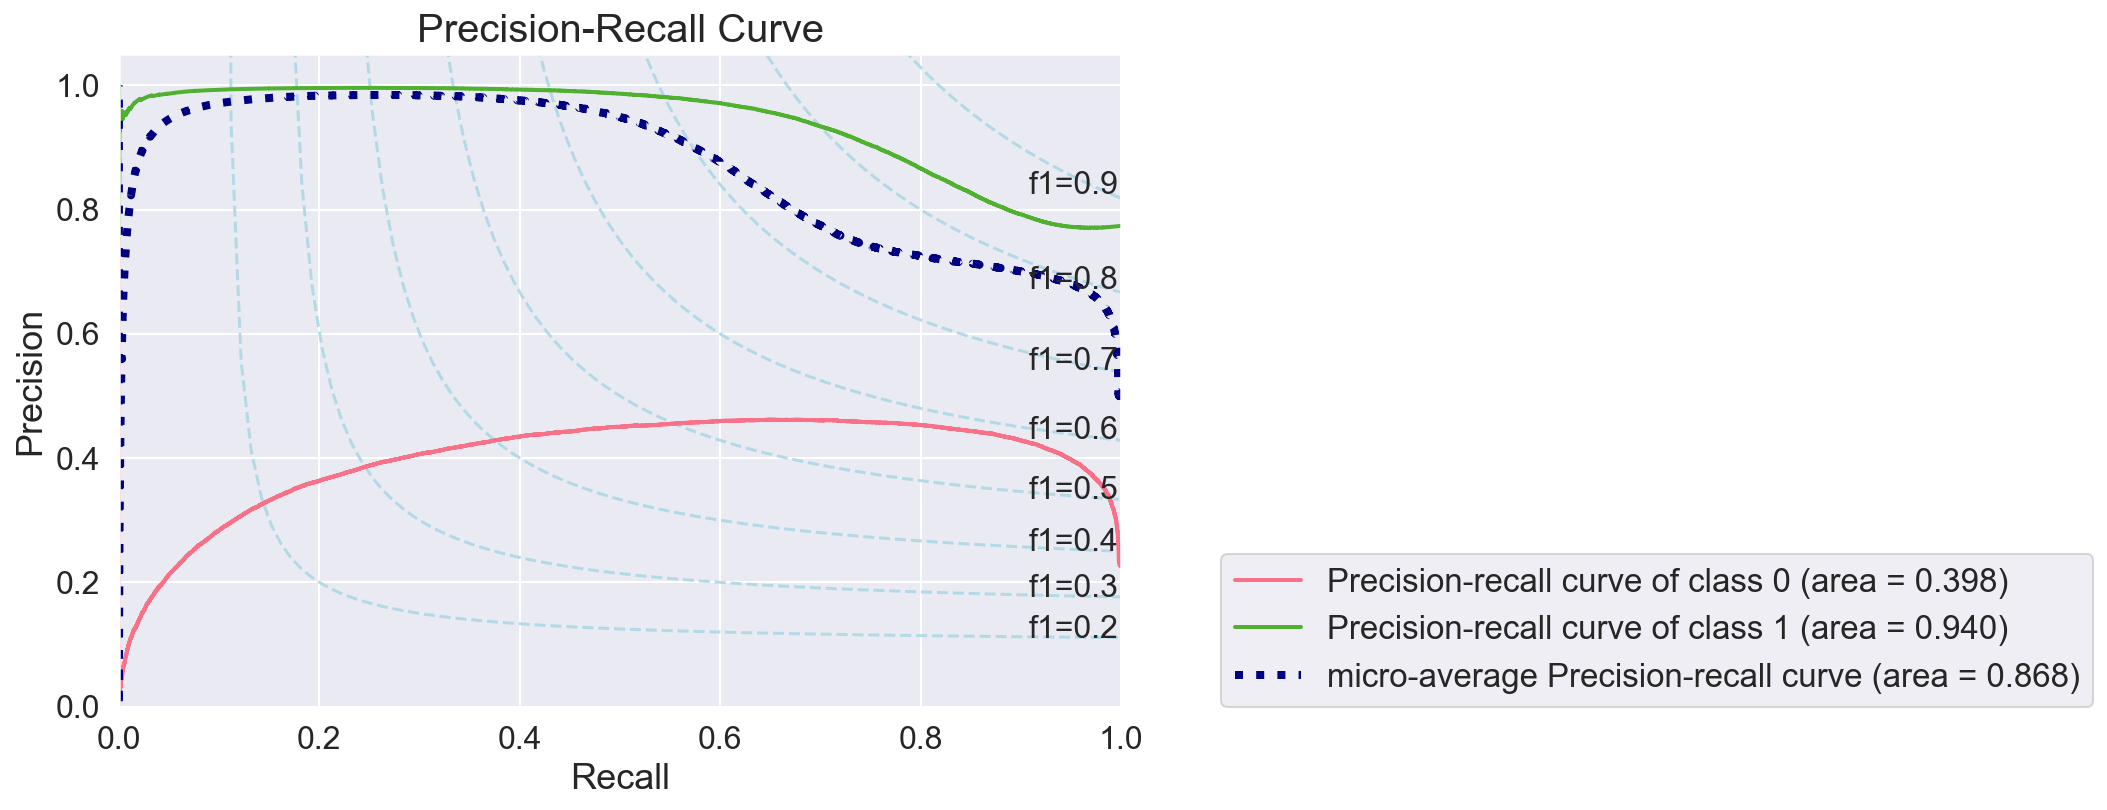

In [55]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

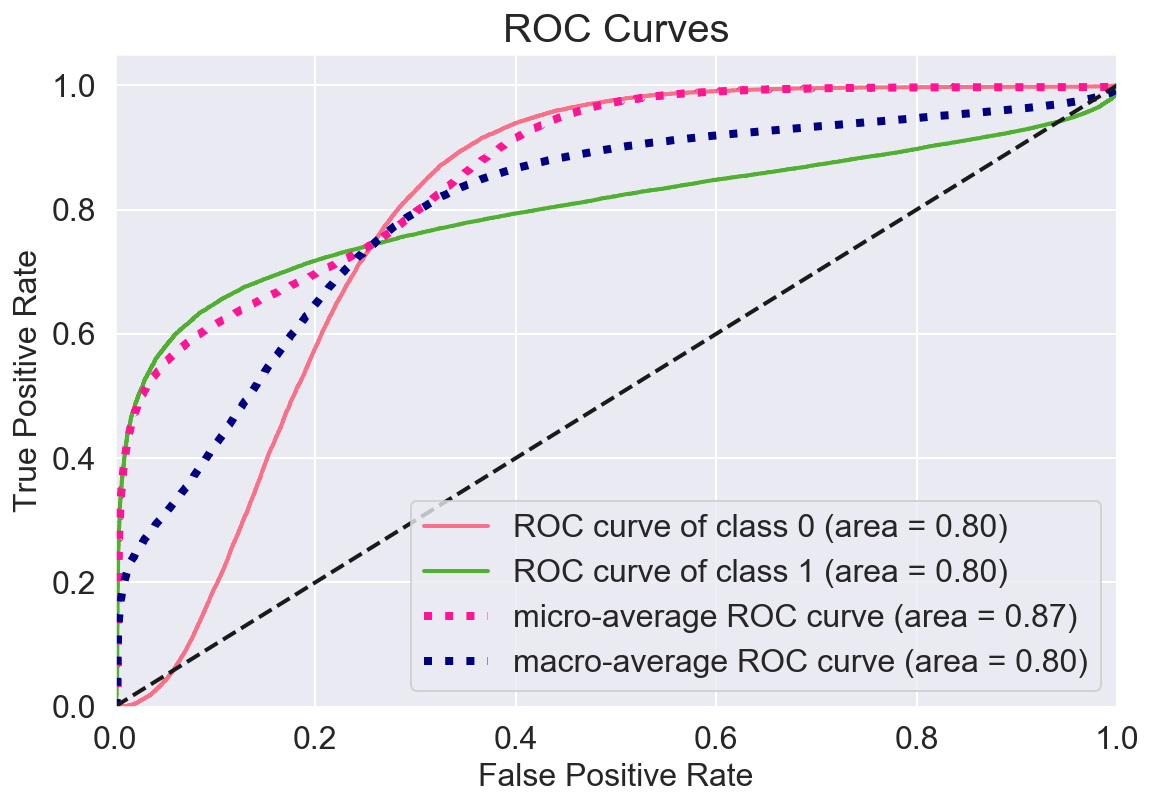

In [56]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [58]:
# Logistic Regression GridSearch

gs_lr_params = {'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga'],
                'C': np.logspace(-3, 0, 5) } #np.logspace(-3, 0, 100)}

model_LR = LogisticRegression(solver='liblinear', multi_class='ovr')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

lr_gridsearch = GridSearchCV(estimator=model_LR,
                             param_grid=gs_lr_params,
                             cv=kf,
                             scoring='accuracy',
                             n_jobs=3,     # runs on 3 cores
                             verbose=1)

In [ ]:
datetime.now()  #20:45

In [59]:
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print('Best Paramaters (logistic Regression): ', lr_gridsearch.best_params_)
print('Best Score (logistic Regression): ', lr_gridsearch.best_score_)
print('Best Logistic Regression: ' , lr_gridsearch.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
lr_gridsearch.score(X_test, y_test)

In [ ]:
datetime.now()

### Random Forest

In [22]:
datetime.now()

datetime.datetime(2020, 5, 13, 12, 28, 50, 227144)

In [23]:
modelRF = RandomForestClassifier() #n_estimators=100, criterion='gini'
modelRF.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
datetime.now()

datetime.datetime(2020, 5, 13, 12, 29, 16, 226898)

In [25]:
print("Score(Train): ", modelRF.score(X_train_pca, y_train))

Score(Train):  0.9972236010276494


In [26]:
datetime.now()

datetime.datetime(2020, 5, 13, 12, 29, 22, 169452)

In [27]:
print("Cross Val Score (Train): ", cross_val_score(modelRF, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelRF.score(X_test_pca, y_test))

Cross Val Score (Train):  0.9416274400747433
Score (Test):  0.9416141208299696


In [28]:
datetime.now()

datetime.datetime(2020, 5, 13, 12, 30, 57, 571954)

In [ ]:
# when ran withoOUT vectorizer - RF (but WITH gini and 100 estimators)

Score(Train):  1.0
Cross Val Score (Train):  0.9432718529372724
Score (Test):  0.9421599441243234
    
# when ran withoOUT vectorizer - RF (but WITHout gini and 100 estimators)

Score(Train):  0.9972236010276494  (28 PCA)
Cross Val Score (Train):  0.9416274400747433
Score (Test):  0.9416141208299696
    
# when ran WITH vectorizer - RF  (but without gini and 100 estimators)

Score(Train):  0.9970763264259727
Cross Val Score (Train):  0.8548963139654087
Score (Test):  0.858278969301595
    
# when ran WITH vectorizer - RF  (but WITH gini and 100 estimators)

Score(Train):  1
Cross Val Score (Train):  
Score (Test): 


In [ ]:
datetime.now()

In [ ]:
# Random Forest Grid Search

In [ ]:
''' param_grid_RF = { 
                    'n_estimators': [10, 50, 100, 200, 500],
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,5,6,7,8, None],
                    'criterion' :['gini', 'entropy']
                } '''

In [ ]:
param_grid_RF = { 
                    'n_estimators': [10, 100, 200],
                    'max_features': ['auto', 'sqrt', 'log2'],
                    'max_depth' : [4,10, None],
                    'criterion' :['gini', 'entropy']
                }

In [ ]:
modelRF_ = RandomForestClassifier(random_state=1) 
modelRF_GS = GridSearchCV(estimator=modelRF_, param_grid=param_grid_RF, cv= 5)
modelRF_GS.fit(X_train, y_train)

In [ ]:
datetime.now()

In [ ]:
print("Best score (Decision Tree): ", modelRF_GS.best_score_)
print("Best params (Decision Tree): ", modelRF_GS.best_params_)
print("Best estimator (Decision Tree): ", modelRF_GS.best_estimator_)

In [ ]:
datetime.now()

In [ ]:
print('Test Score: ' , modelRF_GS.best_estimator_.score(X_test,y_test))

In [ ]:
datetime.now()

In [ ]:
predictions_RF_GS = modelRF_GS.best_estimator_.predict(X_test)
#predictions_RF_GS

probabilities_RF_GS = modelRF_GS.best_estimator_.predict_proba(X_test)
#probabilities_RF_GS

In [ ]:
labels=['low', 'high']
confusion_mat1 = confusion_matrix(y1_test, predictions_RF_GS, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat1,
             columns=['Predicted_Low', 'Predicted_High'],
             index=['True_Low', 'True_High'])

In [ ]:
print(classification_report(y1_test, predictions_RF1))

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y1_test, probabilities_RF_GS, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

In [ ]:
# ROC plot

skplt.metrics.plot_roc(y1_test, probabilities_RF_GS, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

In [ ]:
datetime.now()

In [ ]:
# Write function for diff models and grid search pipeline
try with and without over sampling
LR,
KNN,
DT,
RF
SVM
AdaBoost?
change threshold of probability and see if the accuracy gets better
is recall or precision more imp for me 

death prediction
cost prediction
disease prediction

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()